In [90]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV



In [183]:
train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

In [184]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Değişken Açıkalamaları.
* enrollee_id : İlgili adayın unique ID'si

* city: Şehir Kodu

* city_ development _index : Şehir Gelişim endeksi

* gender: Cinsiyet

* relevent_experience: Geçmiş tecrübe

* enrolled_university: Varsa kayıtlı olunan üniversite kursunun türü.

* education_level: Eğitim seviyesi

* major_discipline : Ana eğitim dalı

* experience: Toplam iş tecrübesi (yıl)

* company_size: Çalıştığı şirketin çalışan sayısı

* company_type : Çalıştığı şirket tipi

* lastnewjob: Önceki iş ve şimdiki iş arasında geçen süre (yıl)

* training_hours: Aldığı eğitim süresi (saat)

* target: 0 – İş Aramıyor, 1 – İş Fırsatlarına Açık


In [185]:
train.shape

(19158, 14)

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [187]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


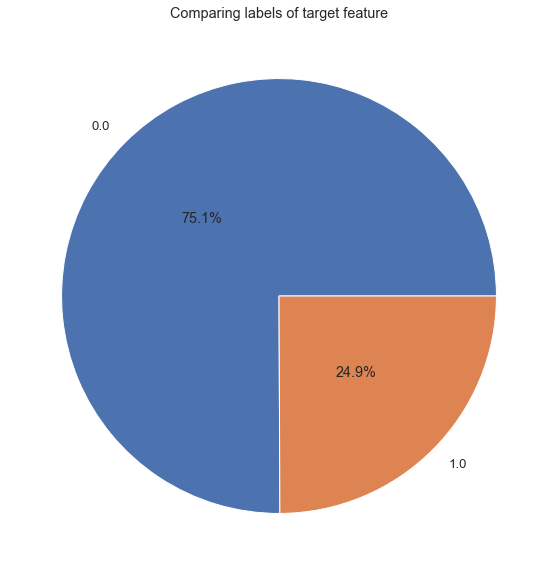

In [372]:
#First Check weather our dataset is balanced or not?
values = train['target'].value_counts().values.tolist()
labels = train['target'].value_counts().index
plt.figure(figsize= (10,10))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.1f%%', pctdistance= .5)
plt.show()


In [373]:
#Let's have a look of missing value
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({#'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


<AxesSubplot:>

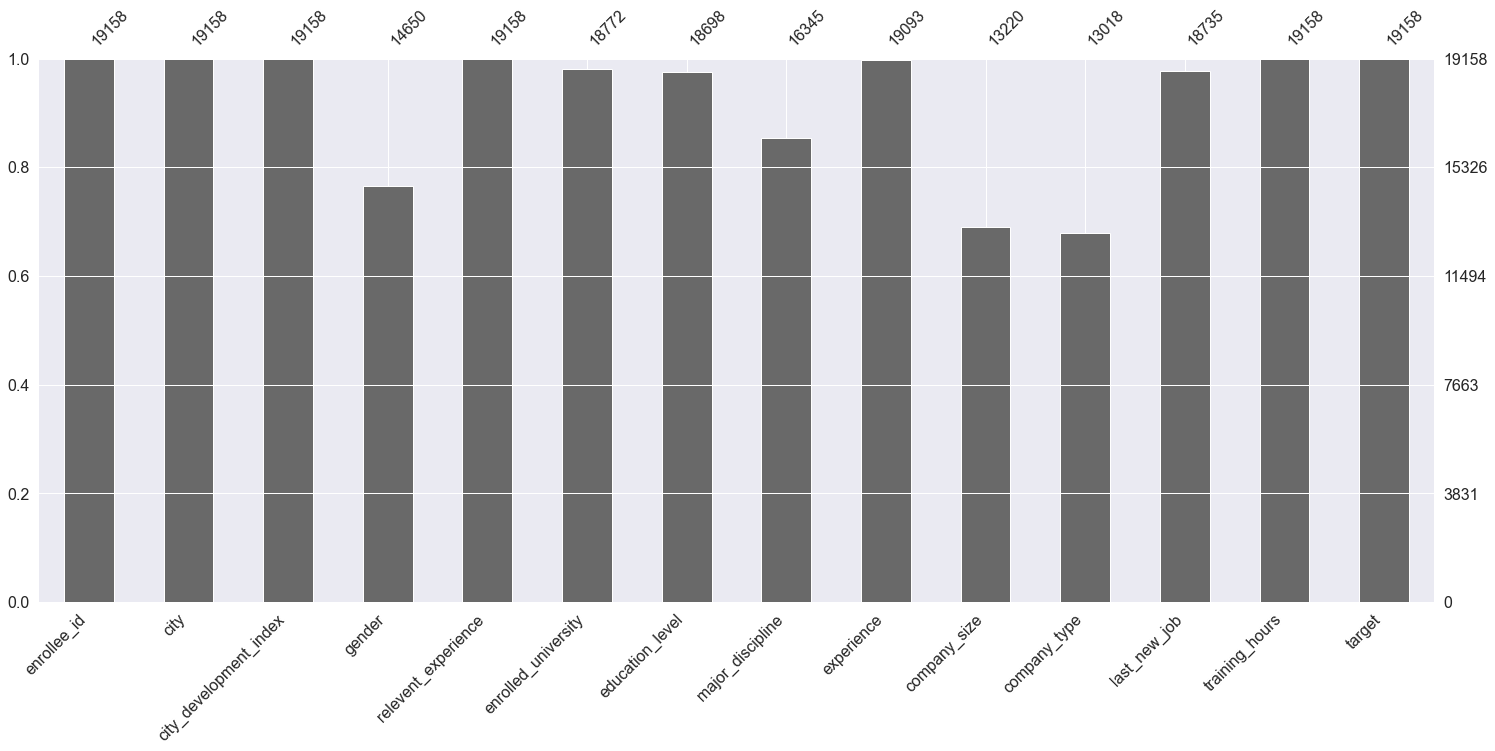

In [374]:
msno.bar(train)

<AxesSubplot:>

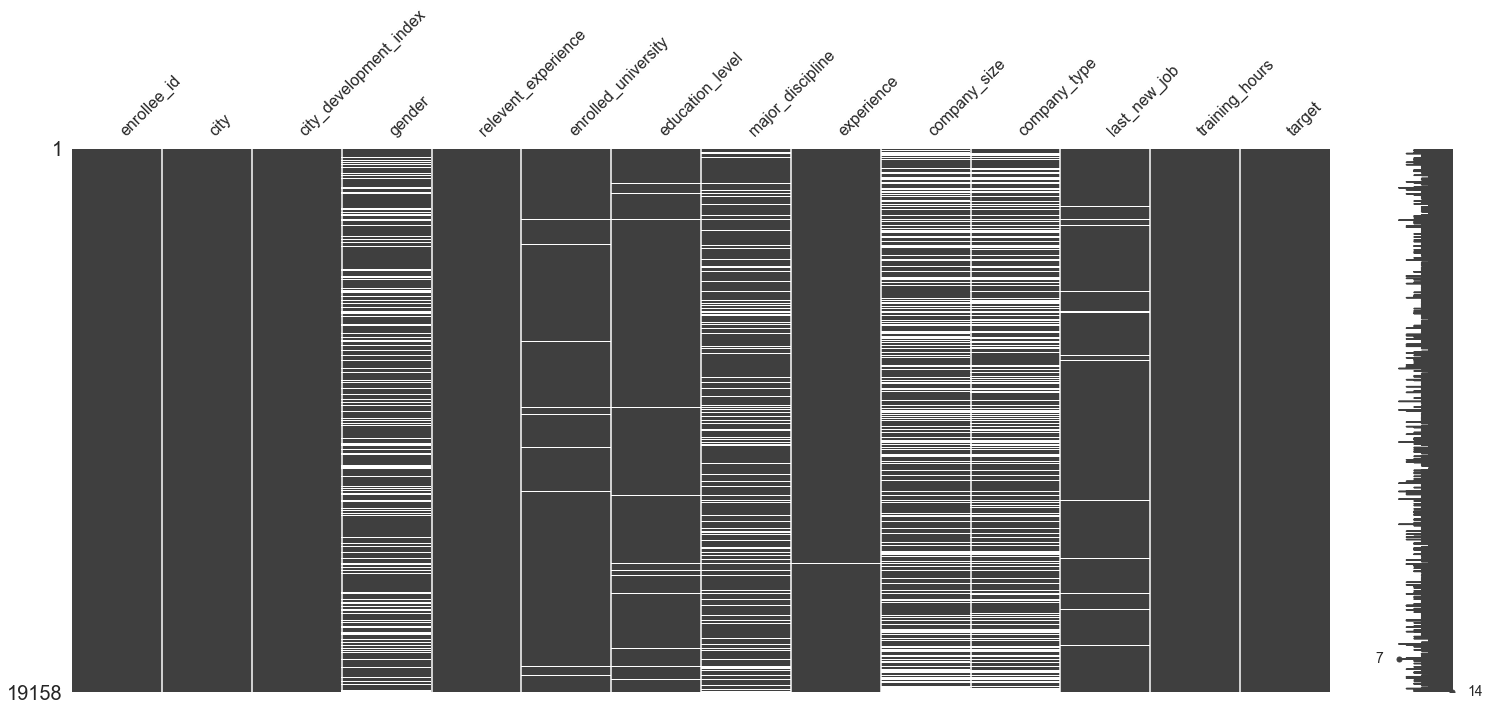

In [375]:
msno.matrix(train)


<AxesSubplot:>

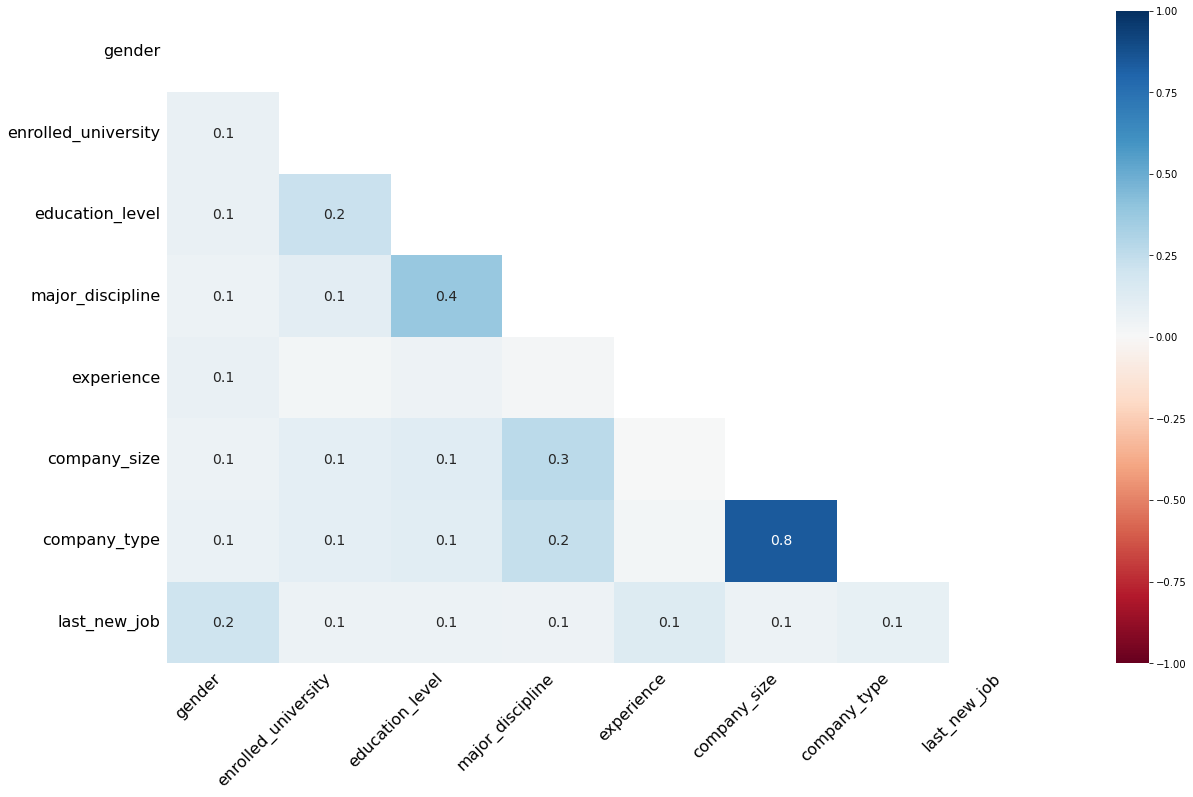

In [189]:
msno.heatmap(train)

<AxesSubplot:>

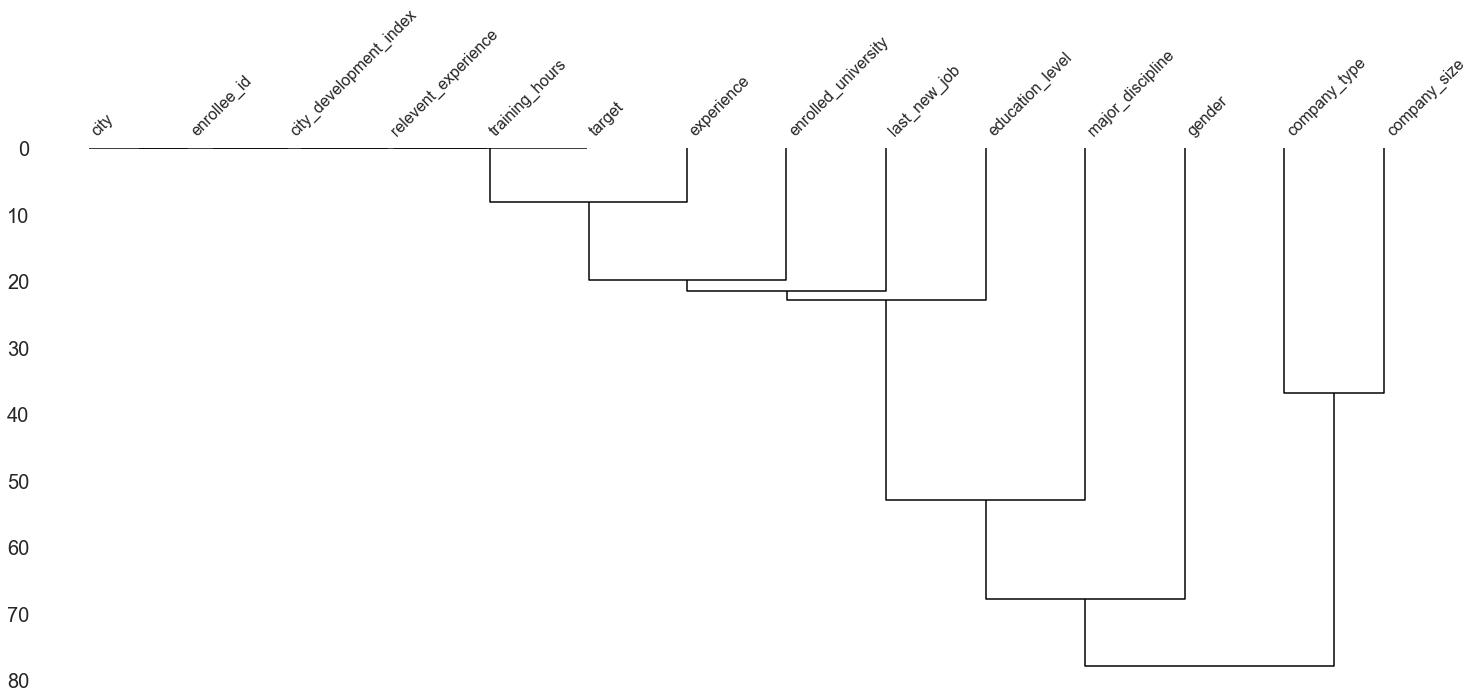

In [376]:
msno.dendrogram(train)

In [190]:
train2 = train.fillna("9999")

In [378]:
train2.isna().mean()

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
city_cat                  0.0
dtype: float64

In [192]:
train2.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

In [380]:
tr0 = train2[train2.target == 0]
tr1 = train2[train2.target == 1]

tr0_a = tr0.groupby(["city"]).agg({"enrollee_id":"count"}).sort_values(by="enrollee_id",ascending=False).reset_index()
tr0_a.columns = ["city","0_count"]
tr1_a = tr1.groupby(["city"]).agg({"enrollee_id":"count"}).sort_values(by="enrollee_id",ascending=False).reset_index()
tr1_a.columns = ["city","1_count"]
tr2 = tr0_a.merge(tr1_a, how="left", on="city")
tr2["sum"] = tr2["0_count"] + tr2["1_count"]
tr2["rate"] = tr2["1_count"] / tr2["sum"]
tr2 = tr2.fillna(0)
tr2 = tr2.sort_values(by="sum", ascending=False).reset_index()
tr2['cumsum_rate'] = tr2["sum"].cumsum() / tr2["sum"].sum()
print(tr2[tr2.cumsum_rate >= 0.8].index[0] / len(tr2.cumsum_rate))

0.18032786885245902


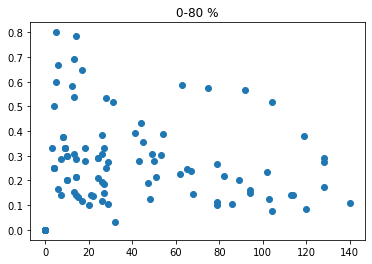

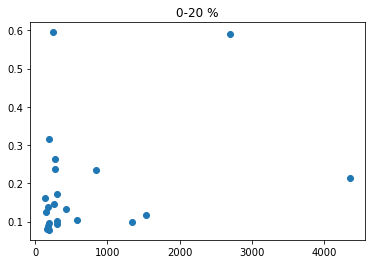

In [194]:
tr3 = tr2[tr2.cumsum_rate >= 0.8]
plt.scatter(tr3["sum"], tr3["rate"])
plt.title("0-80 %")
plt.show()

tr4 = tr2[tr2.cumsum_rate < 0.8]
plt.scatter(tr4["sum"], tr4["rate"])
plt.title("0-20 %")
plt.show()

In [195]:
train2["city_cat"] = "Null"
for i in range(len(train2.enrollee_id)):
    if i <= 40:
        train2["city_cat"].iloc[i] = "Group_1"
    elif i > 40 and i <= 140:
        train2["city_cat"].iloc[i] = "Group_2"
    elif i > 140 and i < 2000:
        train2["city_cat"].iloc[i] = "Group_3"
    elif i >= 2000:
        train2["city_cat"].iloc[i] = "Group_4"
    else:
        train2["city_cat"].iloc[i] = "HATA"
        

In [196]:
train2.groupby(["city_cat"]).agg({"enrollee_id":"count"}).sort_values(by="enrollee_id",ascending=False)

,enrollee_id
city_cat,
Group_4,17158
Group_3,1859
Group_2,100
Group_1,41


In [347]:
def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    elif experience == "9999":
        return 0.1
    else:
        return experience
train2.experience = train2.experience.map(replace).astype(float)
train2.experience = train2.experience.replace(9999,0.1)

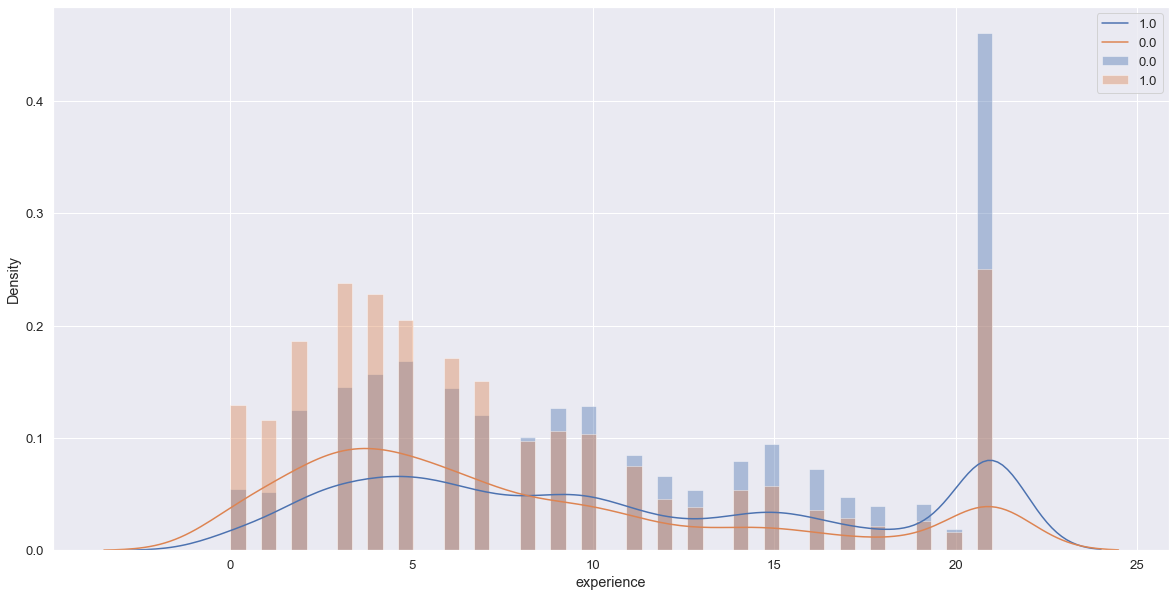

In [349]:
plt.figure(figsize= (20,10))
sns.distplot(train2[train2.target == 0].experience, bins = 50)
sns.distplot(train2[train2.target == 1].experience, bins = 50)

plt.legend(train2.target)

plt.show()

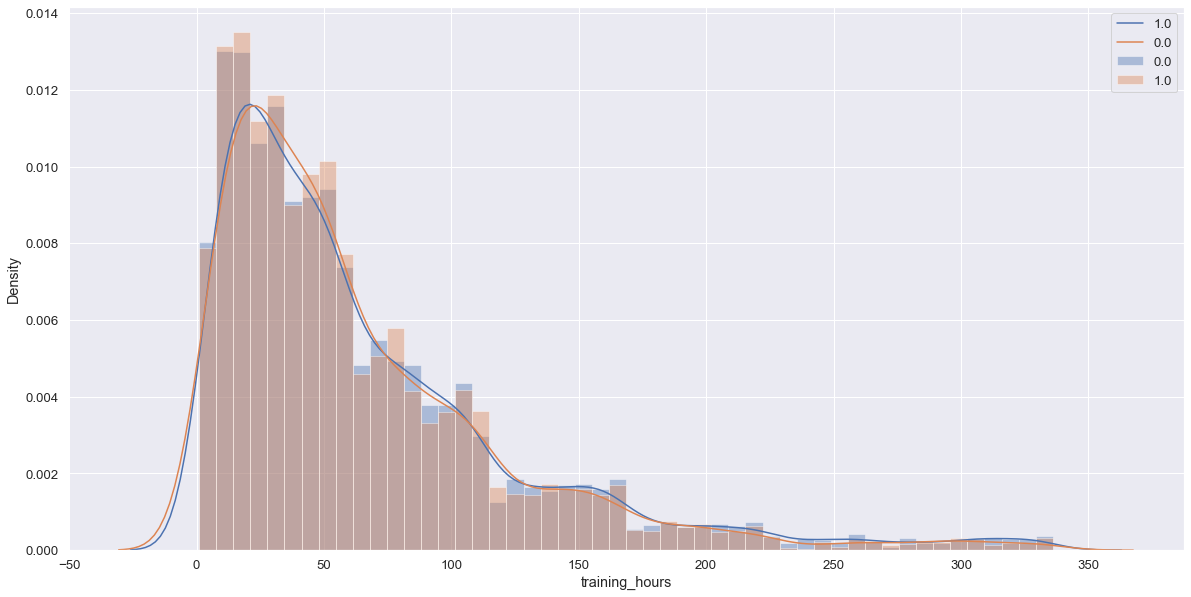

In [340]:
plt.figure(figsize= (20,10))
sns.distplot(train2[train2.target == 0].training_hours, bins = 50)
sns.distplot(train2[train2.target == 1].training_hours, bins = 50)

plt.legend(train2.target)

plt.show()

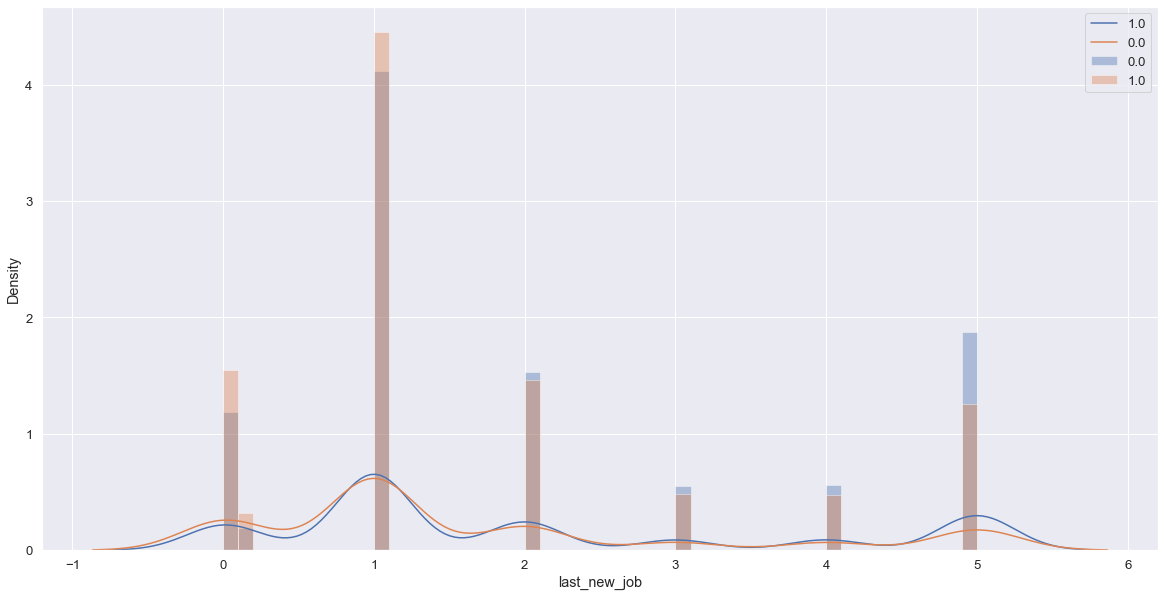

In [351]:
def replace(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0

    else:
        return last_new_job

train2.last_new_job = train2.last_new_job.map(replace)
train2['last_new_job'] = train2['last_new_job'].astype(float)
train2.last_new_job = train2.last_new_job.replace(9999,0.1)

plt.figure(figsize= (20,10))
sns.distplot(train2[train2.target == 0].last_new_job, bins = 50)
sns.distplot(train2[train2.target == 1].last_new_job, bins = 50)

plt.legend(train2.target)

plt.show()

In [201]:
#Now let's have look at my data and hope it's clean now
train2.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_cat
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,9999,9999,1.0,36,1.0,Group_1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0,Group_1
2,11561,city_21,0.624,9999,No relevent experience,Full time course,Graduate,STEM,5.0,9999,9999,0.0,83,0.0,Group_1
3,33241,city_115,0.789,9999,No relevent experience,9999,Graduate,Business Degree,0.0,9999,Pvt Ltd,0.0,52,1.0,Group_1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0,Group_1


In [354]:
train2.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'city_cat'],
      dtype='object')

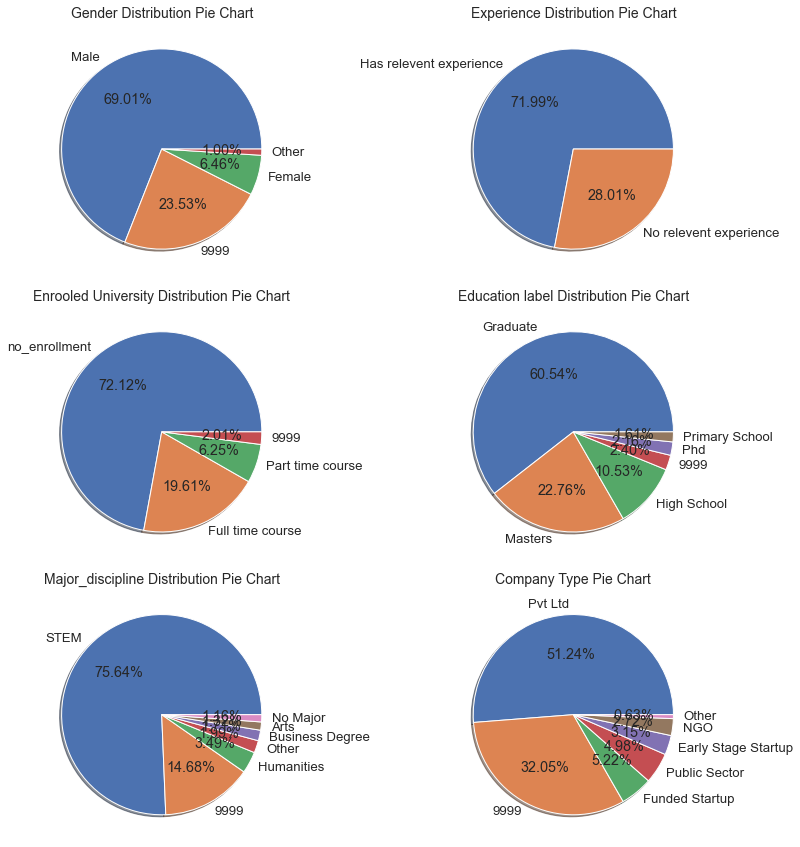

In [384]:

fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax

labels = train2['gender'].value_counts().index
values = train2['gender'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = train2['relevent_experience'].value_counts().index
values = train2['relevent_experience'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Experience Distribution Pie Chart", fontdict={'fontsize': 14})

labels = train2['enrolled_university'].value_counts().index
values = train2['enrolled_university'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Enrooled University Distribution Pie Chart", fontdict={'fontsize': 14})

labels = train2['education_level'].value_counts().index
values = train2['education_level'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Education label Distribution Pie Chart", fontdict={'fontsize': 14})

labels = train2['major_discipline'].value_counts().index
values = train2['major_discipline'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax5.set_title("Major_discipline Distribution Pie Chart", fontdict={'fontsize': 14})



labels = train2['company_type'].value_counts().index
values = train2['company_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax6.set_title("Company Type Pie Chart", fontdict={'fontsize': 14})


plt.tight_layout()
plt.show()


Görselleştirme Notları:


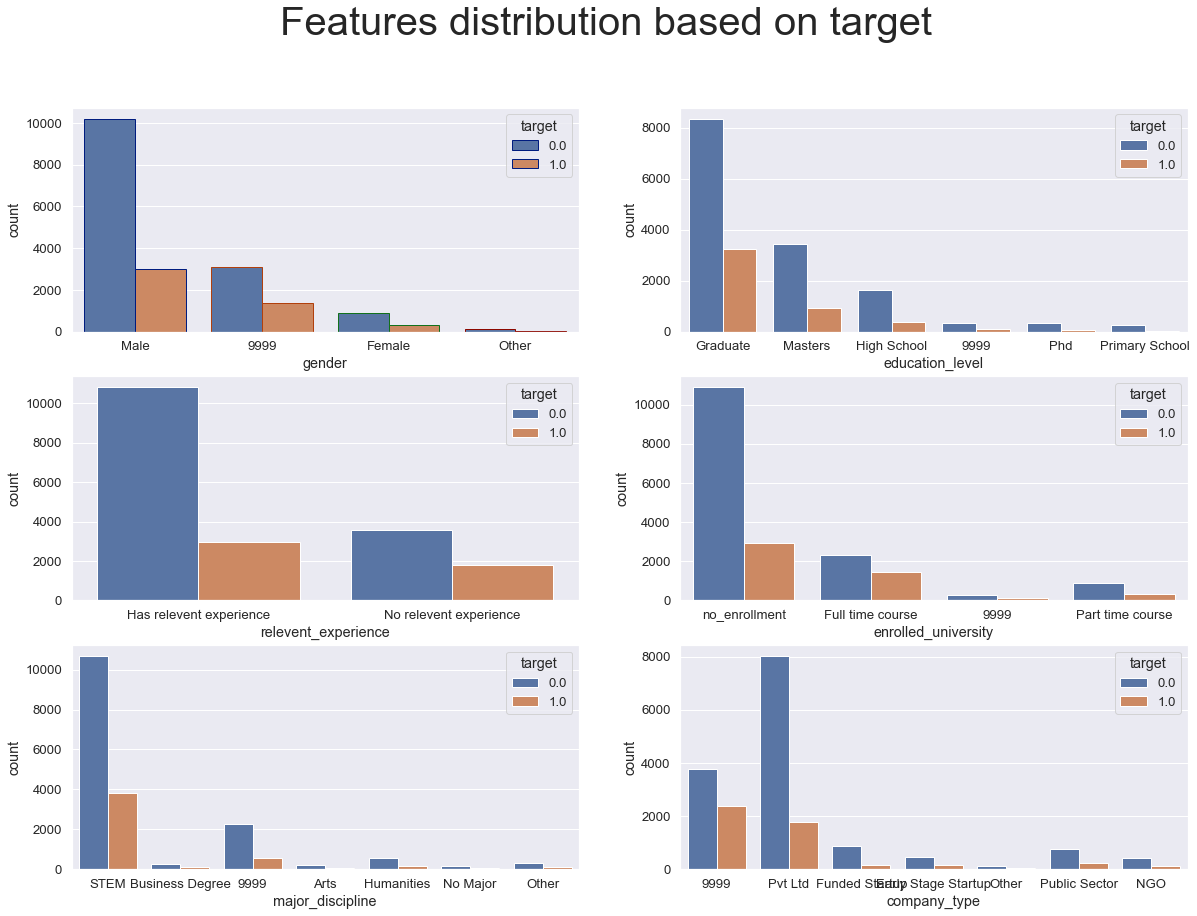

In [356]:
fig_dims = (20, 14)
fig, ax =plt.subplots(3,2,figsize = fig_dims)
sns.countplot(x = train2['gender'],hue = train2['target'], ax=ax[0,0], edgecolor=sns.color_palette("dark", 60))
sns.countplot(train2['education_level'],hue = train2['target'], ax=ax[0,1])
sns.countplot(x = train2['relevent_experience'],hue = train2['target'], ax=ax[1,0])
sns.countplot(train2['enrolled_university'],hue = train2['target'], ax=ax[1,1])
sns.countplot(x = train2['major_discipline'],hue = train2['target'], ax=ax[2,0])
sns.countplot(x = train2['company_type'],hue = train2['target'], ax=ax[2,1])


fig.suptitle('Features distribution based on target ',fontsize=40)
fig.show()


<AxesSubplot:>

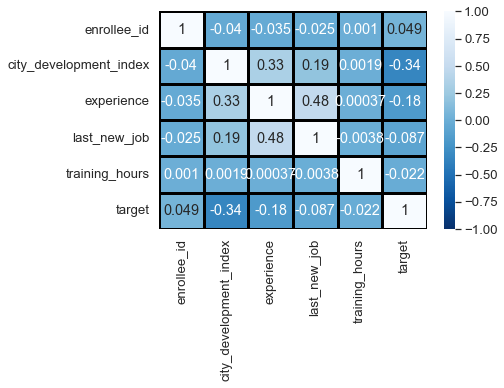

In [367]:
sns.heatmap(train2.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'Blues_r', linewidths=3, linecolor='black')


In [207]:
train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [368]:
train3 = train2.drop(["enrollee_id","city"],axis=1)

<AxesSubplot:xlabel='gender'>

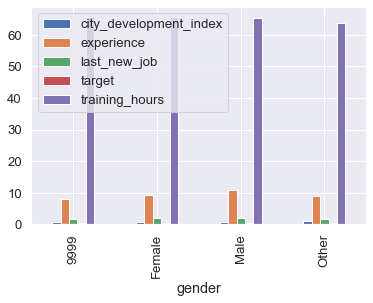

In [369]:
#Let's use pivot table to analyze it.
table = pd.pivot_table(train3,index=['gender'])
table
table.plot(kind='bar')

<AxesSubplot:xlabel='gender,target'>

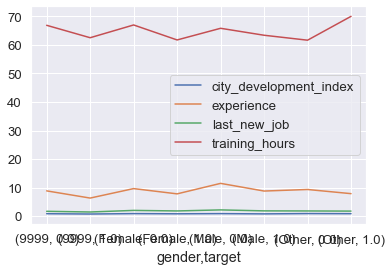

In [370]:
table = pd.pivot_table(train3,index=['gender','target'])
table
table.plot(kind='line')

                               city_development_index  experience  \
gender target education_level                                       
9999   0.0    9999                           0.825383    6.705674   
              Graduate                       0.818308    8.821245   
              High School                    0.834496    5.357248   
              Masters                        0.834775   11.000927   
              Phd                            0.874435   15.524638   
              Primary School                 0.862579    4.144737   
       1.0    9999                           0.660250    6.503333   
              Graduate                       0.715866    5.936971   
              High School                    0.741200    4.347826   
              Masters                        0.720686    8.113428   
              Phd                            0.799357   13.357143   
              Primary School                 0.647579    3.268421   
Female 0.0    9999                

<AxesSubplot:xlabel='gender,target,education_level'>

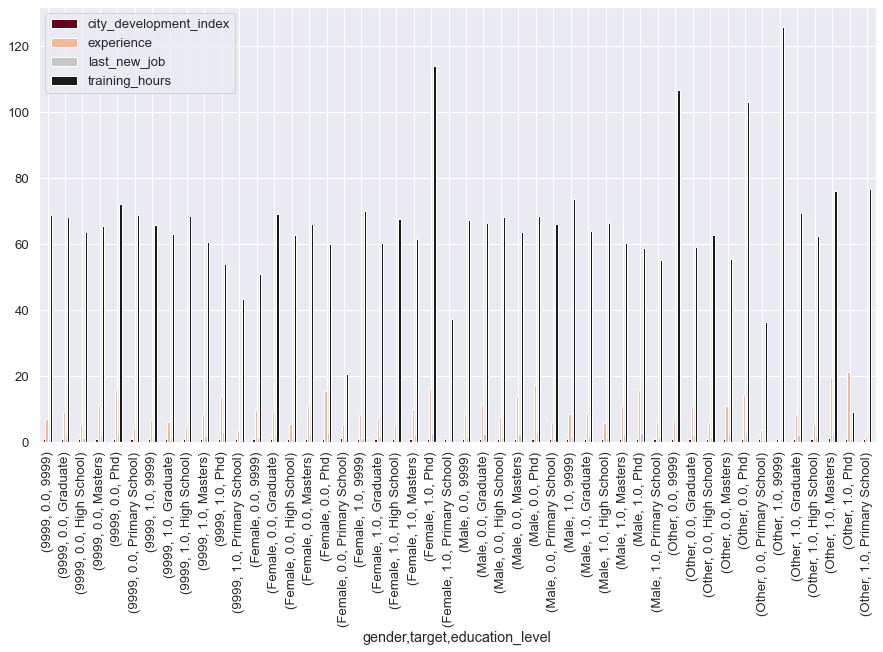

In [371]:
table = pd.pivot_table(train3,index=['gender','target','education_level'])
print(table)
table.plot(kind='bar',
           figsize = (15,8),
           colormap = 'RdGy')

# Encoding The columns

In [212]:
df = train3.copy()

In [213]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  float64
 7   company_size            19158 non-null  object 
 8   company_type            19158 non-null  object 
 9   last_new_job            19158 non-null  float64
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
 12  city_cat                19158 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB
None
city_development_index     93

In [214]:
df2 = pd.get_dummies(df,
                    columns=['gender', 'relevent_experience', 'enrolled_university',
                             'major_discipline','company_size',
                             'company_type','city_cat'],
                    drop_first=True)

Education_level sıralı bir kategorik özellik olduğundan, her bir seviyeyi sırayı göz önünde bulundurarak mapleyebiliriz.

In [218]:
dict_educ = {"Graduate" : 3,
"Masters" : 4,
"High School" : 2,
"9999" : 0,
"Phd" : 5,
"Primary School" : 1}

In [219]:
df2['education_level'] = df2['education_level'].map(dict_educ).astype(int)

In [225]:
X = df2.drop(['target'], axis=1)
y = df2['target']

In [261]:
X1 = df.drop(['target'], axis=1)
y1 = df['target']

In [252]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [263]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [264]:
from sklearn.preprocessing import StandardScaler
ScalerX = StandardScaler()
X_train = ScalerX.fit_transform(X_train)
X_test = ScalerX.transform(X_test)

# Handling imbalance data using SMOTE based techniques

### 1-SMOTE: Synthetic Minority Over sampling Technique (SMOTE) 

* KNN yaklaşımını uygulayarak en yakın K komşuyu seçer, birleştirir ve uzayda sentetik örnekler oluşturur. Algoritma öznitelik vektörlerini ve en yakın komşularını alır, bu vektörler arasındaki uzaklığı hesaplar. Fark (0, 1) arasındaki k değeriyle (KNN) ile çarpılır ve özniteliğe geri eklenir. SMOTE algoritması öncü bir algoritmadır ve diğer birçok algoritma SMOTE'dan türetilmiştir.

![Oversampling](Oversampling.png)

### 2- ADASYN: ADAptive SYNthetic 
* KNN dağılımlarına göre azınlık veri örneklerinin uyarlanabilir bir şekilde üretilmesi fikrine dayanır. Algoritma, dağıtımı uyarlamalı olarak günceller ve verilerin temel dağılımı için yapılan herhangi bir varsayım yoktur. Algoritma, KNN Algoritması için Öklid mesafesini kullanır. ADASYN ve SMOTE arasındaki temel fark, birincisinin, çarpıklığı telafi etmek için farklı azınlık örneklerinin ağırlıklarını uyarlamalı bir şekilde değiştirerek her azınlık numunesi için üretilmesi gereken sentetik numunelerin sayısına otomatik olarak karar vermek için bir kriter olarak bir yoğunluk dağılımı kullanmasıdır. İkincisi, her orijinal azınlık numunesi için aynı sayıda sentetik numune üretir.

![diff](diff.png)


### 3-SMOTETomek: Tomek links
* Yetersiz örnekleme yöntemi veya veri temizleme yöntemi olarak kullanılabilir. Tomek, bir veri temizleme yöntemi olarak aşırı örneklenmiş eğitim setine bağlantı verir. Böylece, yalnızca Tomek bağlantılarını oluşturan çoğunluk sınıfı örneklerini kaldırmak yerine, her iki sınıftan örnekler kaldırılır.

![TomekLinks](TomekLinks.png)


### 4-SMOTEENN: 
* Tıpkı Tomek gibi, K (en yakın komşu), sınıf etiketi en yakın üç komşusundan en az ikisinin sınıfından farklı olan herhangi bir örneği kaldırır. ENN yöntemi, KNN yöntemiyle yapılan tahmini çoğunluk sınıfından farklı olan, çoğunluk sınıfının örneklerini kaldırır. ENN yöntemi, hem gürültülü örnekleri sınırda örnekler olarak kaldırabilir, hem de daha düzgün bir karar yüzeyi sağlar. ENN, Tomek bağlantılarından daha fazla örneği kaldırma eğilimindedir, bu nedenle daha derinlemesine bir veri temizliği sağlaması beklenmektedir.

![SmoteENN](SmoteENN.png)


### A) SMOTE Technique¶

In [231]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 11501, 1.0: 3825})
After Counter({1.0: 11501, 0.0: 11501})


### B) ADASYN Technique

In [232]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)


Before Counter({0.0: 11501, 1.0: 3825})
After Counter({0.0: 11501, 1.0: 11287})


### C) Hybrid Techniques


#### C.1) SMOTE + Tomek Links

In [233]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)


Before Counter({0.0: 11501, 1.0: 3825})
After Counter({1.0: 10535, 0.0: 10535})


### C.2) SMOTE + ENN


In [234]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0.0: 11501, 1.0: 3825})
After Counter({1.0: 6704, 0.0: 6025})


### C.3) SMOTE + Under Sampling 

In [242]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
sm = SMOTE(sampling_strategy = .4)
rus =  RandomUnderSampler(sampling_strategy=.8)

pipeline = Pipeline(steps = [('smote', sm),('under',rus)])

counter = Counter(y_train)
print('Before',counter)
#over and undersampling the train dataset using SMOTE + RandomUnderSampler
X_train_smrus, y_train_smrus = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_smrus)
print('After',counter)

Before Counter({0.0: 11501, 1.0: 3825})
After Counter({0.0: 5750, 1.0: 4600})


# Model Building

In [243]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

### ML MODELS:

![ml](ml.jpg)


## Supervised Learning 
* Classification; 

Sınıflandırmada, bir veri kümesi (data set) birbirinden farklı ve önceden belirlenmiş sınıflardan birine atanmasıdır. Sınıflandırma algoritmaları, verilen eğitim kümesinden hangi veriyi hangi sınıfa atayacağını öğrenir.  Daha sonra test verilerini doğru sınıflara atamaya çalışır.

Verilerin sınıflarını belirten değerlere etiket (label) denir.

Sınıflandırma aslında doğrusal bir fonksiyon değildir.

Sınıflandırma problemine, y’nin kesikli olduğu gerçeğini göz ardı ederek yaklaşabiliriz ve x değerini tahmin etmeye çalışmak için doğrusal regresyon algoritmasını kullanabiliriz.

Fonksiyonumuz “Lojistik Fonksiyon” olarak da adlandırılan “Sigmoid Fonksiyon” unu kullanır.

![classification](classification.png)

* Regression;

Regresyon, bir bağımlı değişken ile diğer bağımsız değişkenler arasındaki ilişkinin gücünü belirlemeye çalışan bu güce göre tahminler ortaya koyan istatistiksel bir ölçümdür. Örneğin, bir çocuğun boyunu her yıl ölçerseniz, yılda yaklaşık 3 santim büyüdüğünü görebilirsiniz. Bu eğilim (yılda üç santim büyüyor) bir regresyon denklemi ile modellenebilir. Aslında, gerçek dünyadaki çoğu şey bir çeşit denklem ile modellenir.

Regresyon denklemleri, verilerinizin bir denkleme uygun olup olmadığını belirlemenize yardımcı olabilir. Gelecekteki tahminleri veya geçmiş davranışların göstergelerini kullanarak verilerinizden tahminlerde bulunmak istiyorsanız bu son derece yararlıdır. Örneğin, tasarruflarınızın gelecekte değerinin ne olacağını bilmek isteyebilirsiniz. Ya da bir hastalıktan kurtulmanın ne kadar süreceğini tahmin etmek isteyebilirsiniz. Bu gibi durumlarda en iyi sonucu regresyon algoritmalarıyla elde edebilirsiniz.

![regression](regression.png)


####     1- Lineer Regresyon Algoritması
2 değişken arasındaki doğrusal ilişkinin bir doğru denklemi olarak tanımlanıp, değişkenin değerlerinden biri bilindiğinde diğeri hakkında tahmin yapılmasını sağlar. Veriler arasında doğru tahmini yapabilmek için veriler için en iyi doğruyu oluşturmak gerekir. En iyi doğruyu oluştururken tüm noktalara en yakın bölge tercih edilmelidir. Lineer Regresyon’da bir doğru oluşturacağımız için bir bağımlı ve bir bağımsız değişken olmak üzere toplam 2 değişken üzerinde çalışılır.


####     2- Multiple Linear Regresyon
Bir bağımlı değişken ile birden fazla bağımsız değişken arasındaki ilişkiyi inceleyen algoritmadır. Linear regresyon ile aynı mantığı kullanır. Sadece birden fazla bağımsız değişken içerir.

####      3- Polinominal Lineer Regresyon
Bir bağımlı birden fazla bağımsız değişken arasında polinomal bir artış söz konusu ise bu algoritma bize en doğru sonucu verecektir.

####      4- Karar Ağacı(Decision Tree) Regresyonu
Karar Ağaçları Algoritmaları hem sınıflandırma da hem de regresyonda kullanılır. Regresyon için kullanılan algoritmayı şöyle açıklamak gerekirse; Bağımsız değişkenleri bilgi kazancına göre aralıklara ayırıyor. Tahmin esnasında bu aralıktan bir değer sorulduğunda cevap olarak bu aralıktaki (eğitim esnasında öğrendiği) ortalamayı söylüyor. Bu sebeple karar ağacı regresyonu diğer regresyon modelleri gibi sürekli değil, kesiklidir. Yani belli bir aralıkta istenen tahminler için aynı sonuçları üretir. Karar Ağaçları bulunulan durumun entropi değerini (rastgelelik derecesini) düşüren seçimler yaparak bilgi kazancını (information gain) maksimize etmeye çalışır. Bunun için de her soruda (düğüm/node) hata fonksiyonunu tekrar hesaplayıp en düşük hataya sahip soruyu/durumu seçer.

####    5-Random Forest Regresyonu
Random Forest Algoritması, birden fazla karar ağacını oluşturur ve daha doğru ve istikrarlı bir tahmin elde etmek için onları birleştirir.Rastgele ormanın büyük bir avantajı, mevcut makine öğrenmesi sistemlerinin çoğunu oluşturan hem sınıflandırma hem de regresyon problemleri için kullanılabilmesidir. Birden çok karar ağacını kullanarak bir sonuç oluşturduğundan Ensemble Learning kategorisine de girer. Esemble Learning, aynı anda birden çok makine öğrenmesi algoritmalarının çalışarak sonuç oluşturması işlemidir.


## Unsupervised Learning 

*  Clustering;

Kümeleme ya da kümeleme analizi bir unsupervised learning (denetimsiz öğrenme) problemidir. Verilerdeki doğal olarak oluşan gruplanmayı keşfetmeyi amaçlar. Supervised learning algoritmalarının aksine, yalnızca girdileri kullanarak, grup ve kümeleri tespit eder.Kümeleme algoritmaları genellikle datada bulunan benzerlikleri analiz etmek maksadıyla kullanılır. Birden fazla kümeleme algoritması bulunmaktadır. Ve tüm durumlar için mükemmel çalışan bir algoritma maalesef ki bulunmamaktadır. Bunun yerine, farklı algoritmaları, farklı datalarda kullanmak daha sağlıklı olacaktır.

Kümeleme algoritmaları, etiketsiz verilerde, tahmin edilecek bir sınıf olmadığında kullanılır. Kümeleme, genellikle datanın featurelarının uzayda bir topluluk oluşturması ve bu topluluğun diğer topluluklardan ayrık olması esasına dayanır.

![clustering](clustering.png)


## Reinforcement Learning 

Reinforcement Learning, bir aracının eylemler gerçekleştirerek ve sonuçları görerek bir ortamda nasıl davranacağını öğrendiği önemli bir Makine Öğrenimi türüdür.

## Ensemble Methods

* Bagging & Boosting

![conf](baggin_boosting.jpeg)

Bu yöntem aynı öğrenme algoritmasını kullanarak birden fazla modeli eğitmek amacıyla kullanılan bir makine öğrenmesi yöntemidir.

Öğrenmede hatanın başlıca ana nedenleri yanlılık , gürültü ve varyanstan kaynaklanmaktadır. Topluluk yöntemi(ensemble) bu belli başlı faktörlerin minimum seviyeye indirilmesine yardımcı olur. Bu yöntemin tasarlanma amacı makine algoritmalarının doğruluğunu ve kararlılığını geliştirmek amacıyla tasarlanmıştır.

Bagging ve Boosting'in farkı nedir?

Boosting yeni veriyi sıralı şekilde oluşturur. Boosting algoritmalarında ağaçlar birbirlerine bağlı ve her bir sınıflandırıcı, önceki sınıflandırıcıların başarısını dikkate alınarak eğitilir. Her bir eğitimden sonra ağırlıklar yeniden paylaştırılır. Yanlış sınıflandırılmış verilerin ağırlıklarını arttırır. En iyi güçlendirme teknikleri AdaBoost, Gradient Boosting ve XgBoost v.b

Bagging yöntemine göz attığımızda ise ağaçların birbirlerinden bağımsız olduğunu söyleyebiliriz. Bagging yönteminde kullanılan en popüler makine öğrenmesi tekniği Rastgele Orman’dır. Rastgele ormanda birden fazla karar ağacı kullanılır.

![conf](bag_bos1.png)
![conf](bag_bos2.png)

## Classification Metrikleri

### Confusion Matrix

![conf](conf.png)

True Positive ve True Negative modelin doğru olarak tahminlediği, False Positive ve False Negative ise modelin yanlış olarak tahminlediği alanlardır.

* True Positive : İş arıyor olarak tahmin ettiklerimiz içinden gerçekten iş arayanlar.

* True Negative: İş aramıyor olarak tahmin ettiklerimiz içinden gerçekten iş aramayanlar.

* False Positive (Type 1 Error): İş arıyor dediğimiz ancak iş aramayanlar.

* False Negative (Type 2 Error): İş aramıyor dediğimiz ancak iş arayanlar.

### Accuracy (Doğruluk)

Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır. Eğer biz 100 mağazadan oluşan bir kitlede 40 mağazanın churn edip etmediğini doğru tahmin edersek Doğruluk değerimiz %40 olacaktır.
Özellikle eşit dağılmayan unbiased veri kümelerinde model doğruluğu tek başına yeterli değildir. Örneğin kanser olan ve olmayan hastaların olduğu 100 kişilik bir veri kümemiz olduğunu düşünelim. Tüm hastalar içinde sadece 10 tanesinde kanser teşhisi konulmuştur. Böyle bir durumda kanser olan ancak teşhis edilemeyen (False Negative) hastalar olmasını istemeyiz. Bu nedenle diğer metriklerin sonuçlarını da birlikte değerlendirmeliyiz.

![accuracy](accuracy.png)

### Precision (Kesinlik)
Kesinlik değeri özellikle False Positive tahminlemenin maliyeti yüksek olduğu durumlarda çok önemlidir. Örneğin mail kutunuza gelmesi gereken mailleri eğer modeliniz spam olarak işaretlerse (FP) bu durumda almanız gereken önemli mailleri görememiş olur ve sizin için kayıp yaratan bir durumda kalırsınız. Bu durumda Kesinlik değerinin yüksek olması bizim için model seçiminde önemli bir kriterdir.

![precision](precision.png)

### Recall (Duyarlılık)
Duyarlılık değeri de False Negative olarak tahminlemenin maliyetinin yüksek olduğu durumlarda bize yardımcı olacak bir metriktir. Mümkün olduğunca yüksek olması gereklidir. Örneğin Fraud Detection için oluşturduğumuz bir model Fraud olan bir işlemi non-fraud olarak işaretlerse böyle bir durumun sonuçları bir banka için sorun teşkil edecektir.

![recall](recall.png)

### F1 Score
Basit bir ortalama yerine harmonik ortalama olmasının sebebi ise uç durumları da gözardı etmememiz gerektiğidir. Eğer basit bir ortalama hesaplaması olsaydı Precision değeri 1 ve Recall değeri 0 olan bir modelin F1 Score’u 0.5 olarak gelecektir ve bu bizi yanıltacaktır.

![f1score](f1score.png)

### ROC & AUC

ROC eğrisi sınıflandırma problemleri için çok önemli bir performans ölçümüdür. ROC bir olasılık eğrisidir ve altında kalan alan olan AUC ayrılabilirliğin derecesini veya ölçüsünü temsil eder.

ROC eğrisinde X ekseninde FPR(Yanlış Pozitif Oran) ve Y ekseninde ise TPR (Gerçek Pozitif Oranı) bulunmaktadır.

![ROC](ROC.png)

Eğrinin altında kalan arttıkça sınıflar arasında ayırt etme performansı artmaktadır.

TPR daha önceden de bildiğimiz gibi Recall(Duyarlılık) değeridir. Yani hasta olan kişileri tespit edebilme oranımızdır. FPR ise hasta olmayan kişiler için hatalı tahmin yapma oranımızdır. Formülleri hatırlamak gerekirse;

![rates](rates.png)

En iyi ROC eğrisini oluşturabilmek için sınıflar arası ayırt edici en iyi threshold değerini bulmamız gerekir. Örneğin hasta olan ve hasta olmayan kullanıcıların olduğu bir veri setinde bir sınıflandırma problemi çalıştığımızı düşünelim. Yapılan tahminler sonucunda her bir veri için skorlar atanır. Farklı threshold değerlerini deneyerek en iyi F1 değerini elde ettiğimizde en iyi ROC eğrisini de oluşturmuş oluruz.

AUC Modelin sınıfları ne kadar başarılı ayırt edebildiğini anlatır. AUC arttıkça, model 0'ları 0 ve 1'leri 1 olarak tahmin etmede daha iyidir. Örneğin hasta olan ve olmayan kullanıcıların olduğu bir veri setinde AUC ne kadar yüksekse, model hastalığı olan ve olmayan hastaları ayırt etmekte daha iyi performans gösterir.

Aşağıdaki grafiklerde görüldüğü gibi AUC değeri yükseldikçe yeşil ve kırmızı olan sınıflar birbirinden iyi bir oranda ayrılmaktadır. Son grafikte görülen AUC değeri 0.5 olan modelin performansının kötü olduğunu ve rastgele tahminleme yaptığı söylenebilir.

![auc](auc.png)

Özellikle dengeli dağılmayan veri setlerinde model başarısını sadece Accuracy metriği ile ölçmek yeterli değerlidir ve Precision-Recall metriklerini mutlaka kontrol etmemiz gereklidir. Ancak Precision değeri arttıkça Recall değerinin azaldığı görülmektedir. Bu nedenle bu iki değerin harmonik ortalaması olan F1 metriği bize sınıflandırma modelimizin gerçek başarısını göstermektedir. ROC eğrisi de bize F1 değeri arttıkça AUC altında kalan alanın arttığını göstermiştir.

## Regresyon metrikleri

### Mean Absolute Error (MAE)

MAE, hata büyüklüğünü ölçmenin basit bir yoludur. Tahminler ve gözlemlenen değerler arasındaki mutlak farkların ortalamasından oluşur. Ölçü, 0'dan sonsuza kadar gider ve alabileceğiniz en iyi değer 0'dır.

Nasıl okunur: 0'a yakın değerler, yüksek değerlerden daha iyidir.

### Root mean squared error (RMSE)

RMSE, bir model tarafından yapılan tahminler ile gerçek değerler arasındaki farkların ikinci dereceden ortalamasını ölçer. Ölçü her zaman pozitif veya 0'dır.

RMSE, karesel hataların ortalamasının karekökü olduğundan, hatanın boyutu önemlidir ve büyük hatalar cezalandırılır. Bu nedenle, bu aykırı değerlere karşı çok hassas bir ölçümdür.

Nasıl okunur: 0'a yakın değerler, yüksek değerlerden daha iyidir.


### Coefficient of Determination (R2 or R-squared)
R2, bağımsız değişkenden tahmin edilebilen bağımlı değişkendeki varyansın oranıdır. Bir modelin gözlemlenen sonuçları kopyalarken ne kadar iyi performans gösterdiğini açıklar.

Genellikle, R-kare 0 ile 1 arasındaki değerlerde ölçülür, ancak R2'nin diğer bazı tanımları -∞ ile 1 arasındaki değerleri kabul eder. Genel olarak, 1'e yakın değerler, 0'a yakın veya negatif olanlardan daha iyidir.

Nasıl okunur: 1'e yakın değerler, düşük değerlerden daha iyidir.

## Cross Validation

Sınıflandırma problemlerinde öncelikle veri setimizi train ve test setleri olarak ayırır daha sonra train veri seti üzerinden model oluşturur ve test veri seti üzerinde yapılan tahminleri test ederiz. Ancak train/test ayrımında bazı problemler bulunabilir . Veri seti ayrımını rastgele yapamamış olabiliriz . Sadece belirli bir yaşta , belirli bir bölgeden , sadece kadın ya da erkekleri seçip onlar üzerinden model kurmuş olabiliriz. Bu da overfitting problemine sebep olacaktır. Bu problemi Cross Validation ile çözebiliriz.

K-Folds Cross Validation’da verilerimizi k farklı alt kümeye böleriz. Verilerimizi eğitmek ve son alt kümeyi test verisi olarak bırakmak için k-1 adet alt kümeyi kullanırız. k adet deney sonucunda ortaya çıkan ortalama hata değeri modelimizin geçerliliğini belirtir.

![cross_val](cross_val.png)

## Hyperparameter Optimization

Makine öğrenmesi modelleri temel olarak bağımlı ve bağımsız değişkenler (target- features) arasındaki ilişkiyi temsil eden matematiksel fonksiyonlara dayanır. Örneğin Lineer Regresyon bağımlı ve bağımsız değişkenler arasında y= mx+b fonksiyonuyla ifade edilebilecek doğrusal bir ilişki olduğunu varsayar. Lineer Regresyon modelinin eğitilmesi sırasında çeşitli optimizasyon teknikleri kullanılarak en uygun m ve b değerleri belilenir bu değerler model parametreleridir.

Parametrelerden farklı olarak hiperparametreler modelin eğitilmesi sırasında öğrenilmez. Modelleme aşamasının öncesinde veri bilimci tarafından belirlenirler. Örneğin non-parametrik sınıflandırma algoritmalarından olan KNN algoritması tahmin edilmek istenen değere en yakın k tane komşusuna bakarak sınıflandırma yapar. Burada k sayısı (n_neighbors : ) ve kullanılacak olan uzaklık metriği (metric : ) modelleme öncesinde veri bilimci tarafından belirtilmesi gereken, modelin performansını arttıran hiperparametrelerdendir.

Hiperparametre optimizasyonu ise, bir makine öğrenmesi algoritması için belirlenen başarı metriğine göre en uygun hiperparametre kombinasyonunu bulma işlemidir.

Hiperparametre optimizasyonu ile model karmaşıklığı dengelenerek overfitting ve underfitting dengesi sağlanabilir.
Yine modelin esnekliğinden kaynaklanan aşırı öğrenme problemi hiperparametreler ile getirilen kısıtlamalarla çözülebilir.

Hiperparametre optimizasyonu için iyi bir temel(base) modele ihtiyaç vardır. Başarısız bir base model üzerinde hiperparametre optimizasyonunun harikalar yaratmasını bekleyemeyiz. Bu aşamada geri dönüp veri ön işleme ve özellik mühendisliği kısımlarında daha fazla zaman harcayarak, iyi bir base model kurduktan sonra hiperparametre optimizasyonu yapmak daha iyi sonuçlar elde edilmesini sağlayacaktır.

Bir makine öğrenmesi algoritması için onlarca hiperparametre ve bu hiperparametrelerin alabileceği onlarca değer olduğu düşünüldüğünde, tüm kombinasyonları tek tek denemenin ve en iyi kombinasyonu seçmenin ne kadar zor olacağı açıktır. Bu sebeple hiperparametre optimizasyonu için farklı yöntemler geliştirilmiştir. GridSearcCV ve RandomizedSearchCV bu yöntemlerdendir. Şimdi de bu iki yöntemin çalışma prensibine, artı ve eksi yönlerine bakalım :

### GridSearchCV
Modelde denenmesi istenen hiperparametreler ve değerleri için bütün kombinasyonlar ile ayrı ayrı model kurulur ve belirtilen metriğe göre en başarılı hiperparametre seti belirlenir.

(+) Tüm kombinasyonları denendiği için en iyi performans gösteren hiperparametre setini belirlemeyi garanti eder. Küçük veri setlerinde ve sadece birkaç tane hiperparametre denenmek istendiğinde çok iyi çalışır.

(-) Büyük bir veri seti ile çalışıldığında ya da denenecek olan hiperparametre sayısı ve değeri arttırıldığında kombinasyon sayısı da katlanarak artacaktır. Kurulan her modelin cross-validation ile test edildiği de düşünüldüğünde maaliyet korkunç derecede artacaktır bu sebeple alternatif olarak RandomSearchCV yöntemi tercih edilebilir.

### RandomizedSearchCV
Rastgele olarak bir hiperparametre seti seçilir ve cross-validation ile model kurularak test edilir. Belirlenen hesaplama süresi limitine ya da iterasyon sayısına ulaşıncaya kadar bu adımlar devam eder.

(+) Büyük veri setlerinde daha az maaliyetle GridSearchCV yöntemiyle elde edilen en iyi skora yakin performans gösterecek hiperparametre setlerlerini belirleyebilir.

(+)Daha geniş bir hiperparametre alanını tarayabilir.

(-)Her ne kadar optimum hiperparametre setine yaklaşsa da tüm olası kombinasyonları tek tek denemediği icyin en iyi performans gösteren hiperparametre setini bulmayı garanti edemez.

In [244]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    pred_prob = (xg_cl.predict_proba(X_test)[:,1] >= treshhold/100).astype(bool)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test)  
    plt.show() 
    #print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)


# Model-1: Logistic Regression

### 1. Original Unsampled Data

In [245]:
log_model=LogisticRegression()

params={'C':np.logspace( -10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=0.04393970560760786, class_weight='balanced')

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


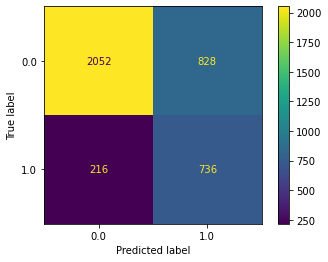

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      2880
         1.0       0.47      0.77      0.59       952

    accuracy                           0.73      3832
   macro avg       0.69      0.74      0.69      3832
weighted avg       0.80      0.73      0.74      3832
 

AUC-ROC
0.7801521650326797


In [265]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

### 2.SMOTE Resampling

In [266]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=10.0)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


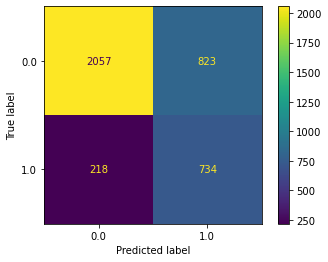

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      2880
         1.0       0.47      0.77      0.59       952

    accuracy                           0.73      3832
   macro avg       0.69      0.74      0.69      3832
weighted avg       0.80      0.73      0.75      3832
 

AUC-ROC
0.7800445699112979


In [267]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

### 3.ADASYN Resampling

In [268]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=0.26826957952797276, class_weight='balanced')

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


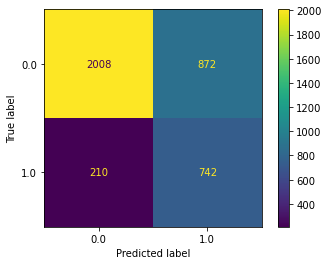

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      2880
         1.0       0.46      0.78      0.58       952

    accuracy                           0.72      3832
   macro avg       0.68      0.74      0.68      3832
weighted avg       0.79      0.72      0.74      3832
 

AUC-ROC
0.7790878851540617


In [269]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

### 4.SMOTE + Tomek Resampling

In [270]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=1.6378937069540613)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


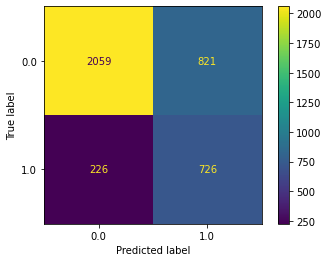

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      2880
         1.0       0.47      0.76      0.58       952

    accuracy                           0.73      3832
   macro avg       0.69      0.74      0.69      3832
weighted avg       0.79      0.73      0.74      3832
 

AUC-ROC
0.7793855042016806


In [271]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

### 5.SMOTE + ENN Resampling

In [272]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=10.0)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


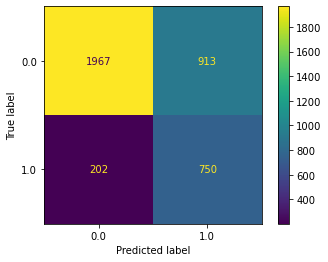

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      2880
         1.0       0.45      0.79      0.57       952

    accuracy                           0.71      3832
   macro avg       0.68      0.74      0.68      3832
weighted avg       0.79      0.71      0.73      3832
 

AUC-ROC
0.7798983134920635


In [273]:

test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

### 6. SMOTE + Under Sampling

In [274]:
clf_LR.fit(X_train_smrus, y_train_smrus)
clf_LR.best_estimator_


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver

LogisticRegression(C=10.0)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


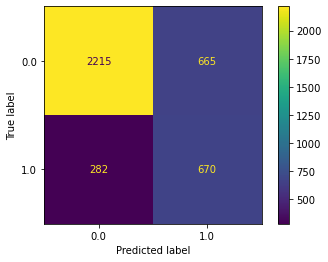

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      2880
         1.0       0.50      0.70      0.59       952

    accuracy                           0.75      3832
   macro avg       0.69      0.74      0.70      3832
weighted avg       0.79      0.75      0.76      3832
 

AUC-ROC
0.7809126254668535


In [275]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+rus')

# Model-2: Decision Tree

In [276]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
#Impurity
criterion = ['gini', 'entropy']
#The number of features to consider when looking for the best split
max_features = ['log2', 'sqrt', 'auto']


### 1. Original Unsampled Data****

In [277]:
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_features':max_features,
    'criterion':criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=2,
                       min_samples_split=20)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


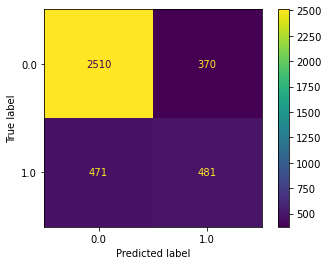

Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      2880
         1.0       0.57      0.51      0.53       952

    accuracy                           0.78      3832
   macro avg       0.70      0.69      0.70      3832
weighted avg       0.77      0.78      0.78      3832
 

AUC-ROC
0.7715640683356675


In [278]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

### 2.SMOTE Resampling

In [279]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=20)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


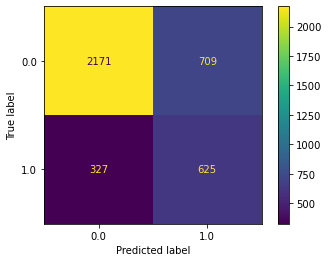

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81      2880
         1.0       0.47      0.66      0.55       952

    accuracy                           0.73      3832
   macro avg       0.67      0.71      0.68      3832
weighted avg       0.77      0.73      0.74      3832
 

AUC-ROC
0.7577969990079365


In [280]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

### 3.ADASYN Resampling

In [281]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


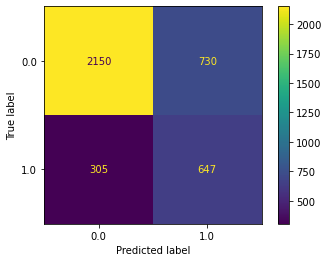

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81      2880
         1.0       0.47      0.68      0.56       952

    accuracy                           0.73      3832
   macro avg       0.67      0.71      0.68      3832
weighted avg       0.77      0.73      0.74      3832
 

AUC-ROC
0.7440654907796452


In [282]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

### 4. SMOTE + Tomek Resampling

In [283]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_split=20)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


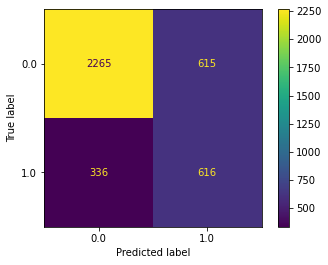

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      2880
         1.0       0.50      0.65      0.56       952

    accuracy                           0.75      3832
   macro avg       0.69      0.72      0.70      3832
weighted avg       0.78      0.75      0.76      3832
 

AUC-ROC
0.7589737978524743


In [284]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

### 5.SMOTE + ENN Resampling

In [285]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=5, min_samples_split=10)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


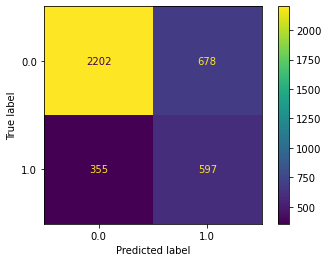

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      2880
         1.0       0.47      0.63      0.54       952

    accuracy                           0.73      3832
   macro avg       0.66      0.70      0.67      3832
weighted avg       0.76      0.73      0.74      3832
 

AUC-ROC
0.7354896125116714


In [286]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

### 6. SMOTE + Under Sampling

In [287]:
clf_DT.fit(X_train_smrus, y_train_smrus)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=5, min_samples_split=50)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


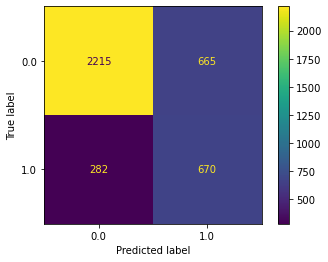

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      2880
         1.0       0.50      0.70      0.59       952

    accuracy                           0.75      3832
   macro avg       0.69      0.74      0.70      3832
weighted avg       0.79      0.75      0.76      3832
 

AUC-ROC
0.7809126254668535


In [288]:
test_eval(clf_LR, X_test, y_test, 'Decision Tree', 'smote+rus')

# Model-3: Random Forest

### 1. Original Unsampled Data

In [289]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_features':max_features,
           'criterion':criterion,
           'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=10)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


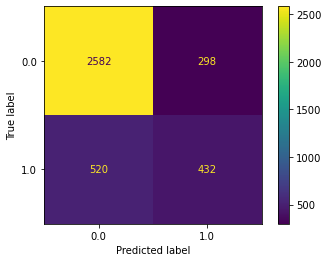

Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      2880
         1.0       0.59      0.45      0.51       952

    accuracy                           0.79      3832
   macro avg       0.71      0.68      0.69      3832
weighted avg       0.77      0.79      0.78      3832
 

AUC-ROC
0.7942099235527543


In [290]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

### 2.SMOTE Resampling

In [291]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=50)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


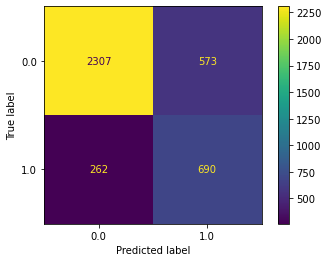

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2880
         1.0       0.55      0.72      0.62       952

    accuracy                           0.78      3832
   macro avg       0.72      0.76      0.73      3832
weighted avg       0.81      0.78      0.79      3832
 

AUC-ROC
0.794280316293184


In [292]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

### 3.ADASYN Resampling

In [293]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=5,
                       min_samples_split=10)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


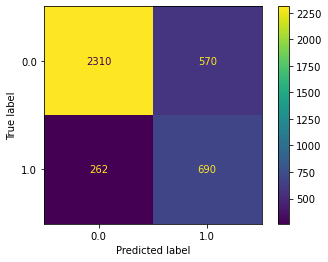

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2880
         1.0       0.55      0.72      0.62       952

    accuracy                           0.78      3832
   macro avg       0.72      0.76      0.74      3832
weighted avg       0.81      0.78      0.79      3832
 

AUC-ROC
0.7917182758520075


In [294]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

### 4. SMOTE + Tomek Resampling

In [295]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=20,
                       n_estimators=50)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


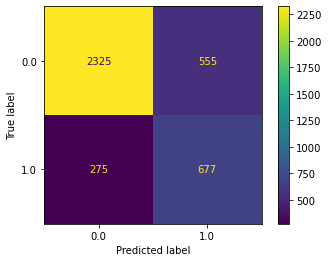

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      2880
         1.0       0.55      0.71      0.62       952

    accuracy                           0.78      3832
   macro avg       0.72      0.76      0.73      3832
weighted avg       0.81      0.78      0.79      3832
 

AUC-ROC
0.7913610235760971


In [296]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

### 5. SMOTE + ENN Resampling

In [297]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=5,
                       n_estimators=30)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


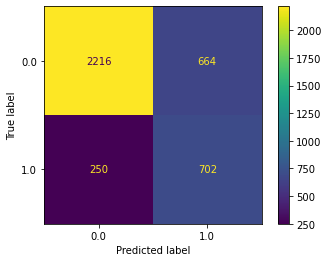

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      2880
         1.0       0.51      0.74      0.61       952

    accuracy                           0.76      3832
   macro avg       0.71      0.75      0.72      3832
weighted avg       0.80      0.76      0.77      3832
 

AUC-ROC
0.7871624431022409


In [298]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

### 6. SMOTE + Under Sampling

In [299]:
clf_RF.fit(X_train_smrus, y_train_smrus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13, max_features='log2', min_samples_leaf=2,
                       min_samples_split=15)

Confusion Matrix


C:\Users\mturkyilmaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


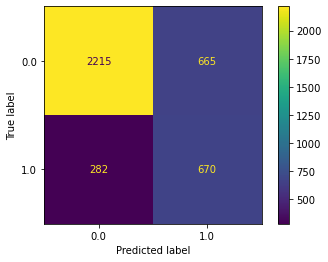

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      2880
         1.0       0.50      0.70      0.59       952

    accuracy                           0.75      3832
   macro avg       0.69      0.74      0.70      3832
weighted avg       0.79      0.75      0.76      3832
 

AUC-ROC
0.7809126254668535


In [300]:
test_eval(clf_LR, X_test, y_test, 'Random Forest', 'smote+rus')

In [301]:
import warnings
warnings.filterwarnings('ignore')

# Model-4: AdaBoost

Confusion Matrix


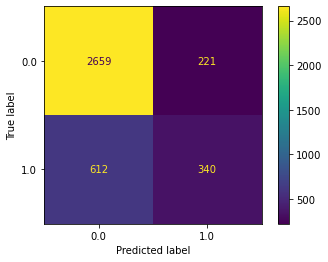

Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2880
         1.0       0.61      0.36      0.45       952

    accuracy                           0.78      3832
   macro avg       0.71      0.64      0.66      3832
weighted avg       0.76      0.78      0.76      3832
 

AUC-ROC
0.8011724220938374


In [302]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada=AdaBoostClassifier()
clf_ada.fit(X_train, y_train)
#Actual data
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'actual')

Confusion Matrix


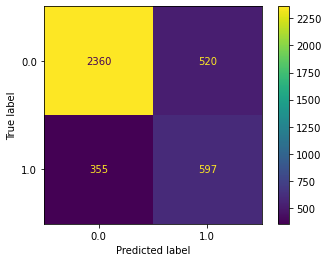

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      2880
         1.0       0.53      0.63      0.58       952

    accuracy                           0.77      3832
   macro avg       0.70      0.72      0.71      3832
weighted avg       0.79      0.77      0.78      3832
 

AUC-ROC
0.7750279017857142
Confusion Matrix


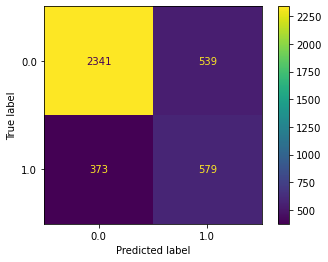

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      2880
         1.0       0.52      0.61      0.56       952

    accuracy                           0.76      3832
   macro avg       0.69      0.71      0.70      3832
weighted avg       0.78      0.76      0.77      3832
 

AUC-ROC
0.7691851219654529
Confusion Matrix


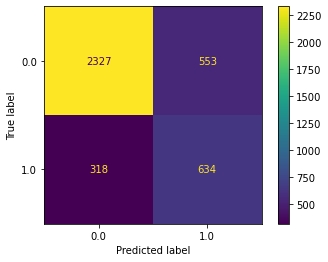

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      2880
         1.0       0.53      0.67      0.59       952

    accuracy                           0.77      3832
   macro avg       0.71      0.74      0.72      3832
weighted avg       0.79      0.77      0.78      3832
 

AUC-ROC
0.780662238853875
Confusion Matrix


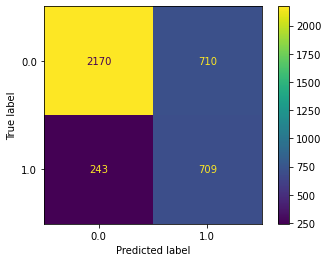

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      2880
         1.0       0.50      0.74      0.60       952

    accuracy                           0.75      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.75      0.76      3832
 

AUC-ROC
0.7885573500233427
Confusion Matrix


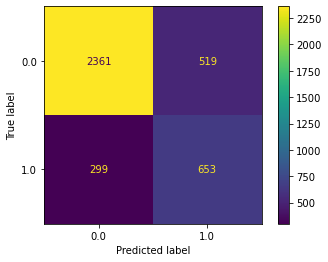

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      2880
         1.0       0.56      0.69      0.61       952

    accuracy                           0.79      3832
   macro avg       0.72      0.75      0.73      3832
weighted avg       0.81      0.79      0.79      3832
 

AUC-ROC
0.797280578898226


In [303]:
#smote
clf_ada.fit(X_train_sm, y_train_sm)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'Smote')

#Adasyn
clf_ada.fit(X_train_ada, y_train_ada)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'adasyn')

#smote + tomek
clf_ada.fit(X_train_smtom, y_train_smtom)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'smote+tomek')

#smote + enn
clf_ada.fit(X_train_smenn, y_train_smenn)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'smote+enn')

#smote + 
clf_ada.fit(X_train_smrus, y_train_smrus)
test_eval(clf_ada, X_test, y_test, 'AdaBoast', 'smote+rus')



# Model-5: GradientBoost

In [304]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_params = { 
    "n_estimators":[1,3,5,10,15,20,30,40,50,],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_gb=RandomizedSearchCV(gb_model,gb_params,cv=cv, scoring='roc_auc',n_jobs=1)

clf_gb.fit(X_train, y_train)
clf_gb.best_estimator_


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                           min_samples_split=15, n_estimators=15)

Confusion Matrix


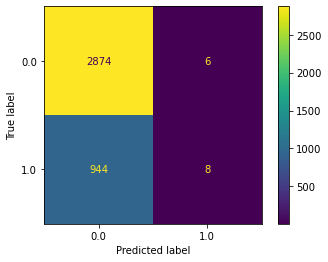

Classification Report
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.57      0.01      0.02       952

    accuracy                           0.75      3832
   macro avg       0.66      0.50      0.44      3832
weighted avg       0.71      0.75      0.65      3832
 

AUC-ROC
0.7920173538165267
Confusion Matrix


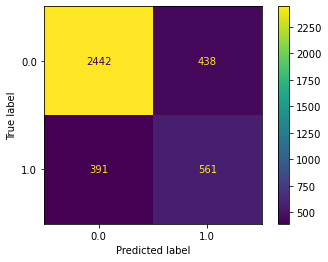

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      2880
         1.0       0.56      0.59      0.58       952

    accuracy                           0.78      3832
   macro avg       0.71      0.72      0.71      3832
weighted avg       0.79      0.78      0.79      3832
 

AUC-ROC
0.7821423100490196
Confusion Matrix


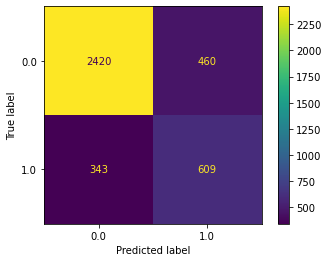

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2880
         1.0       0.57      0.64      0.60       952

    accuracy                           0.79      3832
   macro avg       0.72      0.74      0.73      3832
weighted avg       0.80      0.79      0.79      3832
 

AUC-ROC
0.7920180832749767
Confusion Matrix


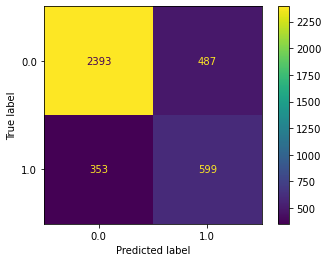

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      2880
         1.0       0.55      0.63      0.59       952

    accuracy                           0.78      3832
   macro avg       0.71      0.73      0.72      3832
weighted avg       0.79      0.78      0.79      3832
 

AUC-ROC
0.788897460025677
Confusion Matrix


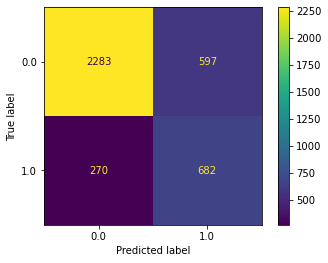

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      2880
         1.0       0.53      0.72      0.61       952

    accuracy                           0.77      3832
   macro avg       0.71      0.75      0.73      3832
weighted avg       0.80      0.77      0.78      3832
 

AUC-ROC
0.7918503078314658
Confusion Matrix


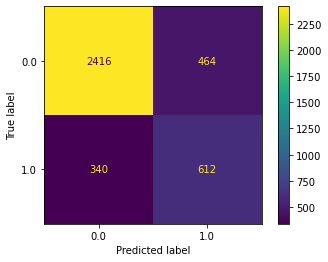

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2880
         1.0       0.57      0.64      0.60       952

    accuracy                           0.79      3832
   macro avg       0.72      0.74      0.73      3832
weighted avg       0.80      0.79      0.79      3832
 

AUC-ROC
0.7850275005835667


In [305]:
#Actual data
#clf_gb.fit(X_train, y_train)
#clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'actual')
#smote
clf_gb.fit(X_train_sm, y_train_sm)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'Smote')

#Adasyn
clf_gb.fit(X_train_ada, y_train_ada)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'adasyn')

#smote + tomek
clf_gb.fit(X_train_smtom, y_train_smtom)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'smote+tomek')

#smote + enn
clf_gb.fit(X_train_smenn, y_train_smenn)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'smote+enn')

#smote + rus
clf_gb.fit(X_train_smrus, y_train_smrus)
clf_gb.best_estimator_
test_eval(clf_gb, X_test, y_test, 'GradientBoast', 'smote+rus')


# Model-6: SGDClassifier

In [306]:
from sklearn.linear_model import SGDClassifier
sgd_params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

sgd_model = SGDClassifier()
clf_sgd=RandomizedSearchCV(sgd_model,sgd_params,cv=cv, scoring='roc_auc',n_jobs=1)

clf_sgd.fit(X_train, y_train)
clf_sgd.best_estimator_


SGDClassifier(alpha=0.01, loss='log')

Confusion Matrix


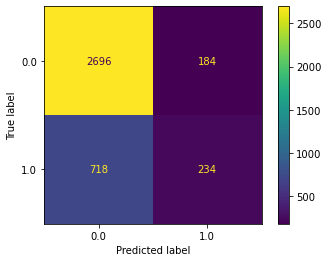

Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2880
         1.0       0.56      0.25      0.34       952

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832
 

AUC-ROC
0.7786669876283848
Confusion Matrix


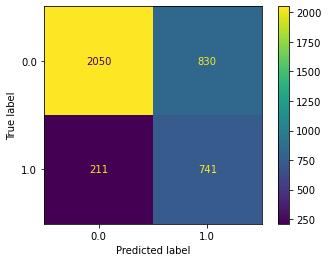

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      2880
         1.0       0.47      0.78      0.59       952

    accuracy                           0.73      3832
   macro avg       0.69      0.75      0.69      3832
weighted avg       0.80      0.73      0.75      3832
 

AUC-ROC
0.7789992559523808
Confusion Matrix


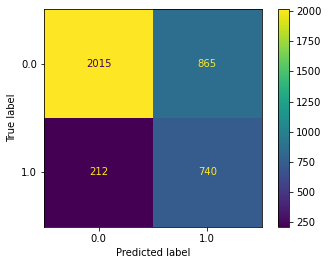

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      2880
         1.0       0.46      0.78      0.58       952

    accuracy                           0.72      3832
   macro avg       0.68      0.74      0.68      3832
weighted avg       0.79      0.72      0.74      3832
 

AUC-ROC
0.7780465832166199
Confusion Matrix


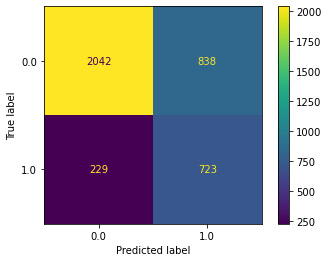

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      2880
         1.0       0.46      0.76      0.58       952

    accuracy                           0.72      3832
   macro avg       0.68      0.73      0.68      3832
weighted avg       0.79      0.72      0.74      3832
 

AUC-ROC
0.7760489612511672
Confusion Matrix


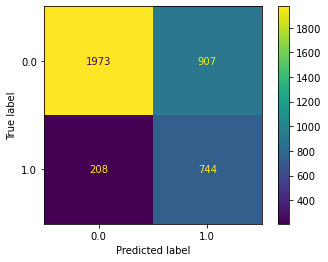

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      2880
         1.0       0.45      0.78      0.57       952

    accuracy                           0.71      3832
   macro avg       0.68      0.73      0.68      3832
weighted avg       0.79      0.71      0.73      3832
 

AUC-ROC
0.7794351073762839
Confusion Matrix


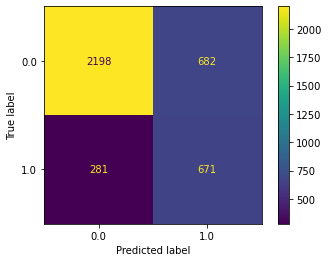

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      2880
         1.0       0.50      0.70      0.58       952

    accuracy                           0.75      3832
   macro avg       0.69      0.73      0.70      3832
weighted avg       0.79      0.75      0.76      3832
 

AUC-ROC
0.7785433444211017


In [307]:
#Actual data
#clf_gb.fit(X_train, y_train)
#clf_gb.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'actual')
#smote
clf_sgd.fit(X_train_sm, y_train_sm)
clf_sgd.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'Smote')

#Adasyn
clf_sgd.fit(X_train_ada, y_train_ada)
clf_sgd.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'adasyn')

#smote + tomek
clf_sgd.fit(X_train_smtom, y_train_smtom)
clf_sgd.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'smote+tomek')

#smote + enn
clf_sgd.fit(X_train_smenn, y_train_smenn)
clf_sgd.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'smote+enn')

#smote + rus
clf_sgd.fit(X_train_smrus, y_train_smrus)
clf_sgd.best_estimator_
test_eval(clf_sgd, X_test, y_test, 'SGDClassifier', 'smote+rus')


# Model-7: LGBMClassifier

In [310]:
import lightgbm as lgbm

In [311]:

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

lgb_model = lgbm.LGBMClassifier()
lgb_params ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 200), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'bagging_fraction': sp_uniform(0.5, 0.8),
             #'bagging_frequency': sp_randint(5, 8),
             'feature_fraction': sp_uniform(0.5, 0.8),
             'max_depth': sp_randint(10, 13),
             'min_data_in_leaf': sp_randint(50, 80),}
#clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
clf_lgb=RandomizedSearchCV(lgb_model,lgb_params,cv=cv, scoring='roc_auc',n_jobs=1)

clf_lgb.fit(X_train, y_train)
clf_lgb.best_estimator_


[LightGBM] [Warning] feature_fraction is set=1.0112228043620597, colsample_bytree=0.8622708519851814 will be ignored. Current value: feature_fraction=1.0112228043620597
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=154 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_fraction is set=1.1802079285227385, subsample=0.513126872038155 will be ignored. Current value: bagging_fraction=1.1802079285227385
[LightGBM] [Warning] feature_fraction is set=1.0112228043620597, colsample_bytree=0.8622708519851814 will be ignored. Current value: feature_fraction=1.0112228043620597
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=154 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_fraction is set=1.1802079285227385, subsample=0.513126872038155 will be ignored. Current value: bagging_fraction=1.1802079285227385
[LightGBM] [Warning] feature_fraction is set=1.0112228043620597, colsample_bytree=0.8622708519

LGBMClassifier(bagging_fraction=0.9174369061221272,
               colsample_bytree=0.7454250899222916,
               feature_fraction=0.533658772372007, max_depth=11,
               min_child_samples=195, min_child_weight=1e-05,
               min_data_in_leaf=78, num_leaves=30, reg_alpha=1, reg_lambda=50,
               subsample=0.22904684676266385)

Confusion Matrix


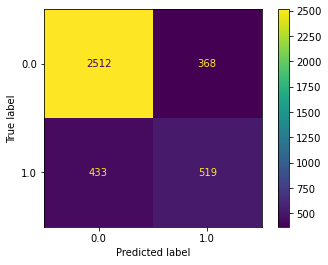

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2880
         1.0       0.59      0.55      0.56       952

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832
 

AUC-ROC
0.8028352226307189
[LightGBM] [Warning] feature_fraction is set=1.1482051136030687, colsample_bytree=0.9306748442634637 will be ignored. Current value: feature_fraction=1.1482051136030687
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=147 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] bagging_fraction is set=0.7724653579386139, subsample=0.31651138336618384 will be ignored. Current value: bagging_fraction=0.7724653579386139
[LightGBM] [Warning] feature_fraction is set=1.1482051136030687, colsample_bytree=0.9306748442634637 will be ignored. Current value: feature_fraction=1.148205113603068

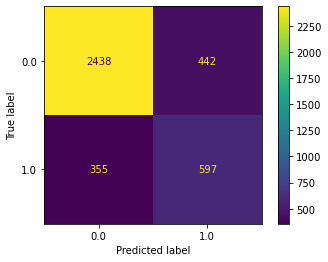

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2880
         1.0       0.57      0.63      0.60       952

    accuracy                           0.79      3832
   macro avg       0.72      0.74      0.73      3832
weighted avg       0.80      0.79      0.79      3832
 

AUC-ROC
0.7991738883053221
[LightGBM] [Warning] feature_fraction is set=0.813660779662889, colsample_bytree=0.4915491074461046 will be ignored. Current value: feature_fraction=0.813660779662889
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=143 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_fraction is set=0.8393807786864751, subsample=0.4114451694758417 will be ignored. Current value: bagging_fraction=0.8393807786864751
[LightGBM] [Warning] feature_fraction is set=0.813660779662889, colsample_bytree=0.4915491074461046 will be ignored. Current value: feature_fraction=0.813660779662889
[Li

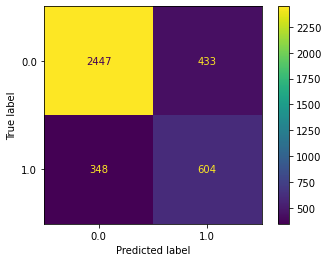

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      2880
         1.0       0.58      0.63      0.61       952

    accuracy                           0.80      3832
   macro avg       0.73      0.74      0.73      3832
weighted avg       0.80      0.80      0.80      3832
 

AUC-ROC
0.8007637429971988
[LightGBM] [Warning] feature_fraction is set=1.2065252471521775, colsample_bytree=0.6988847508624227 will be ignored. Current value: feature_fraction=1.2065252471521775
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=148 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_fraction is set=1.1269176635854716, subsample=0.42049984778795946 will be ignored. Current value: bagging_fraction=1.1269176635854716
[LightGBM] [Warning] feature_fraction is set=1.2065252471521775, colsample_bytree=0.6988847508624227 will be ignored. Current value: feature_fraction=1.206525247152177

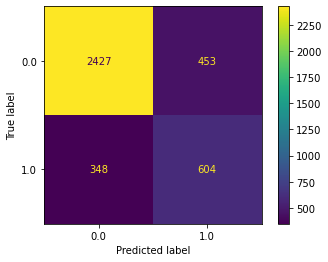

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      2880
         1.0       0.57      0.63      0.60       952

    accuracy                           0.79      3832
   macro avg       0.72      0.74      0.73      3832
weighted avg       0.80      0.79      0.79      3832
 

AUC-ROC
0.8017311872665733
[LightGBM] [Warning] feature_fraction is set=0.8362605655992146, colsample_bytree=0.6701501472146518 will be ignored. Current value: feature_fraction=0.8362605655992146
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=122 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_fraction is set=1.2888601445128587, subsample=0.5698639201549783 will be ignored. Current value: bagging_fraction=1.2888601445128587
[LightGBM] [Warning] feature_fraction is set=0.8362605655992146, colsample_bytree=0.6701501472146518 will be ignored. Current value: feature_fraction=0.8362605655992146

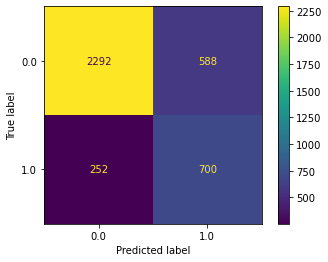

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2880
         1.0       0.54      0.74      0.62       952

    accuracy                           0.78      3832
   macro avg       0.72      0.77      0.74      3832
weighted avg       0.81      0.78      0.79      3832
 

AUC-ROC
0.7986401070845004
[LightGBM] [Warning] feature_fraction is set=0.676037117519352, colsample_bytree=0.42239764252841466 will be ignored. Current value: feature_fraction=0.676037117519352
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=188 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_fraction is set=1.1378424731808585, subsample=0.7410744245599681 will be ignored. Current value: bagging_fraction=1.1378424731808585
[LightGBM] [Warning] feature_fraction is set=0.676037117519352, colsample_bytree=0.42239764252841466 will be ignored. Current value: feature_fraction=0.676037117519352
[

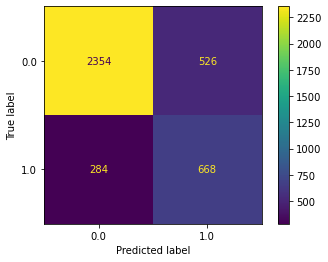

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      2880
         1.0       0.56      0.70      0.62       952

    accuracy                           0.79      3832
   macro avg       0.73      0.76      0.74      3832
weighted avg       0.81      0.79      0.80      3832
 

AUC-ROC
0.800342480742297


In [312]:
#Actual data
#clf_gb.fit(X_train, y_train)
#clf_gb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'actual')
#smote
clf_lgb.fit(X_train_sm, y_train_sm)
clf_lgb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'Smote')

#Adasyn
clf_lgb.fit(X_train_ada, y_train_ada)
clf_lgb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'adasyn')

#smote + tomek
clf_lgb.fit(X_train_smtom, y_train_smtom)
clf_lgb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'smote+tomek')

#smote + enn
clf_lgb.fit(X_train_smenn, y_train_smenn)
clf_lgb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'smote+enn')

#smote + rus
clf_lgb.fit(X_train_smrus, y_train_smrus)
clf_lgb.best_estimator_
test_eval(clf_lgb, X_test, y_test, 'LGBMClassifier', 'smote+rus')


# Model-8: MLPClassifier

In [313]:
from sklearn.neural_network import MLPClassifier
clf_mlp  = MLPClassifier()
clf_mlp.fit(X_train, y_train)


MLPClassifier()

Confusion Matrix


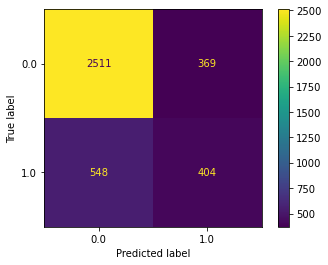

Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      2880
         1.0       0.52      0.42      0.47       952

    accuracy                           0.76      3832
   macro avg       0.67      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832
 

AUC-ROC
0.7537092962184874
Confusion Matrix


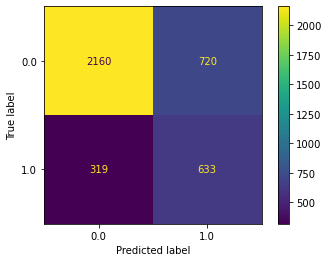

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81      2880
         1.0       0.47      0.66      0.55       952

    accuracy                           0.73      3832
   macro avg       0.67      0.71      0.68      3832
weighted avg       0.77      0.73      0.74      3832
 

AUC-ROC
0.7382079394257703
Confusion Matrix


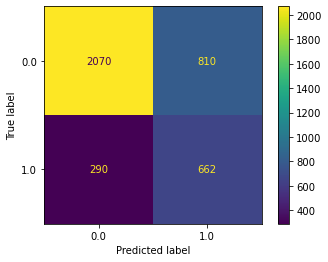

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      2880
         1.0       0.45      0.70      0.55       952

    accuracy                           0.71      3832
   macro avg       0.66      0.71      0.67      3832
weighted avg       0.77      0.71      0.73      3832
 

AUC-ROC
0.7296298727824464
Confusion Matrix


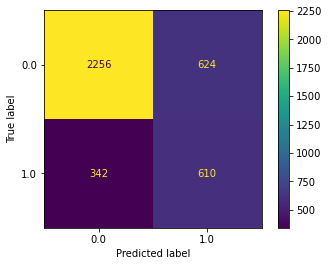

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      2880
         1.0       0.49      0.64      0.56       952

    accuracy                           0.75      3832
   macro avg       0.68      0.71      0.69      3832
weighted avg       0.78      0.75      0.76      3832
 

AUC-ROC
0.7473655608076564
Confusion Matrix


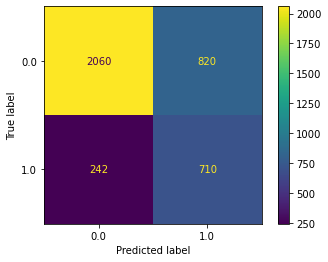

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.72      0.80      2880
         1.0       0.46      0.75      0.57       952

    accuracy                           0.72      3832
   macro avg       0.68      0.73      0.68      3832
weighted avg       0.79      0.72      0.74      3832
 

AUC-ROC
0.7592480742296919
Confusion Matrix


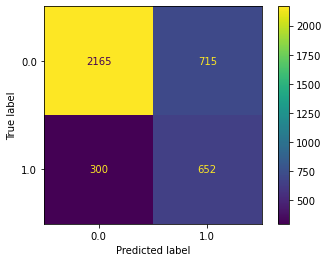

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81      2880
         1.0       0.48      0.68      0.56       952

    accuracy                           0.74      3832
   macro avg       0.68      0.72      0.69      3832
weighted avg       0.78      0.74      0.75      3832
 

AUC-ROC
0.75406016573296


In [314]:
#Actual data
#clf_gb.fit(X_train, y_train)
#clf_gb.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'actual')
#smote
clf_mlp.fit(X_train_sm, y_train_sm)
#clf_mlp.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'Smote')

#Adasyn
clf_mlp.fit(X_train_ada, y_train_ada)
#clf_mlp.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'adasyn')

#smote + tomek
clf_mlp.fit(X_train_smtom, y_train_smtom)
#clf_mlp.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'smote+tomek')

#smote + enn
clf_mlp.fit(X_train_smenn, y_train_smenn)
#clf_mlp.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'smote+enn')

#smote + rus
clf_mlp.fit(X_train_smrus, y_train_smrus)
#clf_mlp.best_estimator_
test_eval(clf_mlp, X_test, y_test, 'MLPClassifier', 'smote+rus')


              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66      2880
         1.0       0.37      0.84      0.51       952

    accuracy                           0.60      3832
   macro avg       0.64      0.68      0.59      3832
weighted avg       0.77      0.60      0.62      3832



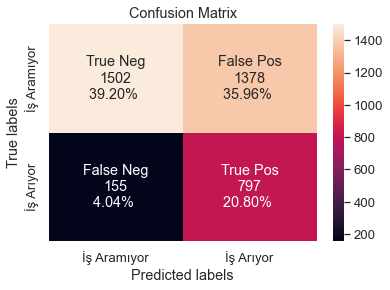

In [395]:
treshold = 20
pred_prob = (clf_mlp.predict_proba(X_test)[:,1] >= treshold/100).astype(bool)

cm=confusion_matrix(y_test,pred_prob)
ax= plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3} "for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['İş Aramıyor', 'İş Arıyor']); ax.yaxis.set_ticklabels(['İş Aramıyor', 'İş Arıyor'])

print(classification_report(y_test,pred_prob))

# Model Comparision

In [315]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.470588,0.773109,0.585056,0.780152
1,Logistic Regression,actual,0.470588,0.773109,0.585056,0.780152
2,Logistic Regression,smote,0.471419,0.771008,0.585094,0.780045
3,Logistic Regression,adasyn,0.459727,0.779412,0.578332,0.779088
4,Logistic Regression,smote+tomek,0.469295,0.762605,0.581032,0.779386
5,Logistic Regression,smote+enn,0.450992,0.787815,0.573614,0.779898
6,Logistic Regression,smote+rus,0.501873,0.703782,0.585920,0.780913
7,Decision Tree,actual,0.565217,0.505252,0.533555,0.771564
8,Decision Tree,smote,0.468516,0.656513,0.546807,0.757797
9,Decision Tree,adasyn,0.469862,0.679622,0.555603,0.744065


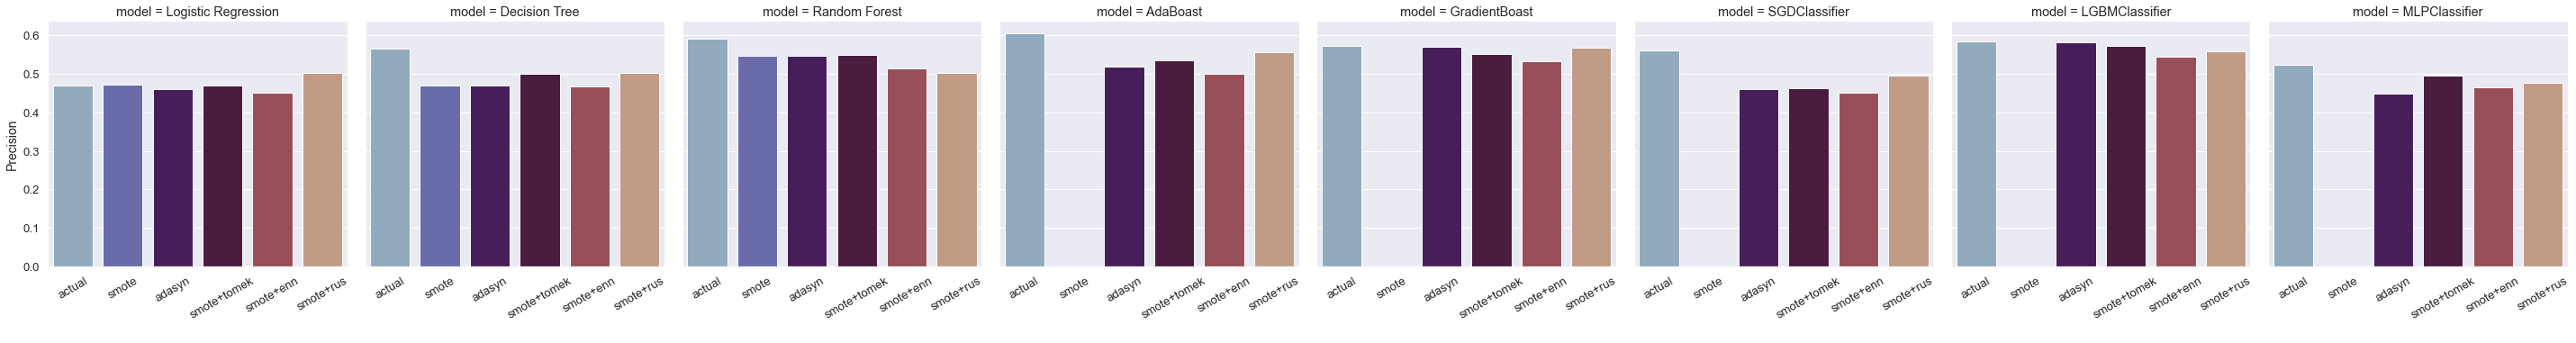

In [327]:

sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn", "smote+tomek", "smote+enn","smote+rus"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Precision', fontsize=14)
plt.show()